# Get distribution for each item from ismdb or each predictor varaible from I/O matrix
* Getting distribution from ismdb requires connection to ismdb
* Getting distributino from I/O matrix can be done locally as long as I/O matrix is saved locally

In [1]:
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

import pdb
import numpy as np
import numpy.matlib
import random

from sqlalchemy.orm import create_session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, DateTime, Float
from sqlalchemy import create_engine, MetaData, Table, func


import sys, os
import pandas as pd
import time, datetime
from datetime import timedelta
from scipy import io
import pickle
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

pd.set_option("display.max_colwidth",80)
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",60)

np.seterr(divide='ignore')

import pedAKI_utilities as paki
import ism_utilities_Ben as ism

fileDir = os.path.dirname("__file__")
path2normscr = os.path.join(fileDir,"csv_files", "ped_normal_scr.csv")

_age_lim = [(1/12.,1/2.), (1/2., 1.), (1., 4.), (4., 7.), (7., 9.), (9., 21.)]
path2chartitem_csv = os.path.join(os.path.dirname("__file__"), "csv_files", "chartitem2.csv")
chartitem = pd.DataFrame.from_csv(path2chartitem_csv)

In [ ]:
ismdb = ism.queryISM()

scrdataframe = ismdb.getItemData(1461, 1, 'mg/dl', unique_census_time=True)
scrdf_total = paki.cleanSCrDf(scrdataframe, path2normscr, ex_age=True, ex_los=True, 
                              ex_aki_adm=True, aki_adm_hr=12, enc_per_pat=True)

In [ ]:
scrdf_total = pd.read_pickle(os.path.join(os.path.dirname("__file__"),"pickle_files", "scr_onset_tlag012_tot.pkl"))
# scrdataframe = pd.read_pickle(os.path.join(os.path.dirname("__file__"),"pickle_files", "scr_admit_tlag012_tot.pkl"))

In [ ]:
ceid_list = scrdf_total.encounter_id.unique()

## Get distribution from ismdb

In [ ]:
# Get distribution from ism db
plt.ion()

for item in chartitem.label.unique():
    print(item)
    itemdf = chartitem.loc[chartitem.label==item,:]
    itemid = itemdf.item_id_CHLA.tolist()
    valcol = itemdf.val_col_CHLA.tolist()
    _uom_str = itemdf.uom_proc.unique()[0]
    val_lim_str = chartitem.val_lim[chartitem.label==item].values[0]
    pdf_lim_str = chartitem.pdf_lim[chartitem.label==item].values[0]
    val_lim = eval(val_lim_str)
    pdf_lim = eval(pdf_lim_str)
    ismdb.getDistFeature(itemid, valcol, item, 10, ceid_list, uom_str=_uom_str,
                        age_lim=_age_lim, abv=item, dump_fig=True, xlim=val_lim, ylim=pdf_lim)

In [ ]:
val_lim_str = chartitem.val_lim[chartitem.label==item].values[0]
pdf_lim_str = chartitem.pdf_lim[chartitem.label==item].values[0]

eval("val_lim=" + val_lim_str)
# eval("pdf_lim={}".format(pdf_lim_str))


## Get distribution from the I/O matrix when the reference time is admission time

In [ ]:
# Get distribution from the I/O matrix
reload(paki)
plt.ion

_age_lim = [(1/12.,1/2.), (1/2., 1.), (1., 4.), (4., 7.), (7., 9.), (9., 21.)]
path2chartitem_csv = os.path.join(os.path.dirname("__file__"), "csv_files", "chartitem.csv")
chartitem = pd.DataFrame.from_csv(path2chartitem_csv)

io_admit_aki = pd.read_pickle(os.path.join(os.path.dirname("__file__"), "pickle_files", "io_admit_tlag012_aki1.pkl"))
io_admit_con = pd.read_pickle(os.path.join(os.path.dirname("__file__"), "pickle_files", "io_admit_tlag012_con1.pkl"))
_io_admit = pd.concat([io_admit_aki, io_admit_con])
_io_admit = _io_admit.drop(['race_unique'], axis=1)

# # Load the value/pdf dynamic range for each item
# xlim_all = list()
# ylim_all = list()
# for item in _io_admit.columns:
#     label = item[:item.rfind("_")]
#     xlim = chartitem.val_lim[chartitem.label==label].unique()
#     ylim = chartitem.pdf_lim[chartitem.label==label].unique()
#     if xlim:
#         eval("xlim_all.append({})".format(xlim[0]))
#         eval("ylim_all.append({})".format(ylim[0]))
        
# paki.getDistIOmat(_io_admit, 'admit', age_lim=_age_lim, sex=None, xlim=xlim_all, ylim=ylim_all, dump_fig=True)

## Distribution of lactic acid (admit)

In [ ]:
xlim_all = [(0,80)]*3
ylim_all = [(0,0.2)]*3
_io_admit_lac = _io_admit.loc[:, ['patient_id', 'encounter_id', 'age', 'sex', 'AKI_stage',
                                  'lactic_acid_min', 'lactic_acid_max', 'lactic_acid_mean']]
paki.getDistIOmat(_io_admit_lac, 'admit', age_lim=_age_lim, sex=None, xlim=xlim_all, ylim=ylim_all, dump_fig=True)

## Distribution of blood urea nitrogen (admit)

In [ ]:
_io_admit_bun = _io_admit.loc[:, ['patient_id', 'encounter_id', 'age', 'sex', 'AKI_stage',
                                  'bun_min', 'bun_max', 'bun_mean']]
paki.getDistIOmat(_io_admit_bun, 'admit', age_lim=_age_lim, sex=None, xlim=None, ylim=None, dump_fig=True)

## Get the distribution when the reference time is AKI onset

best bandwidth: 0.1


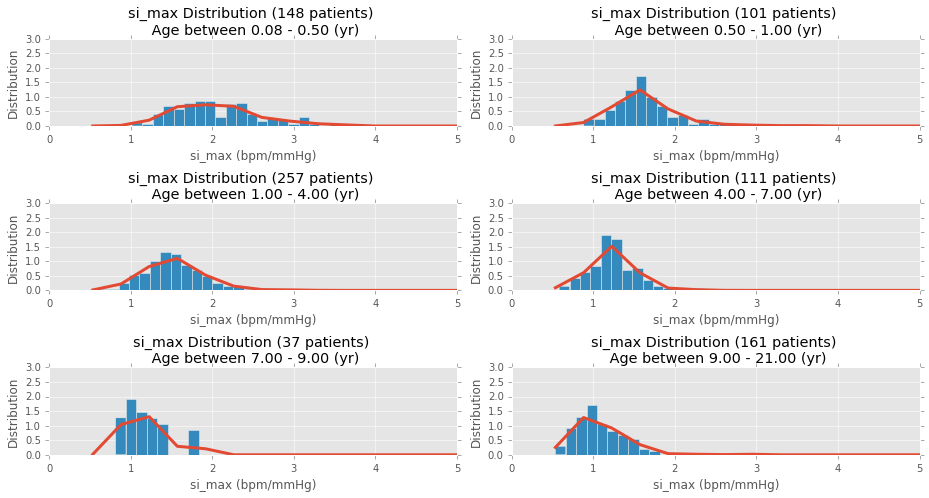

Adjust X/Y limits? (y/n)n
best bandwidth: 0.215443469003


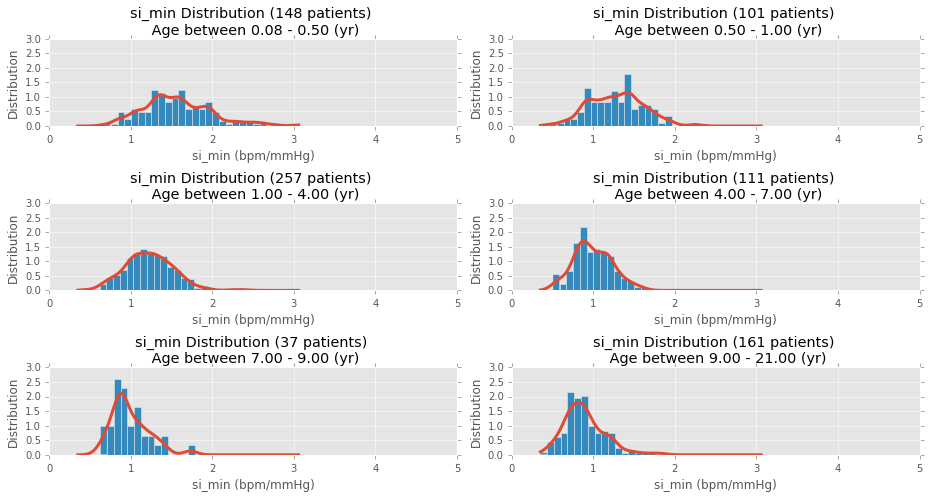

Adjust X/Y limits? (y/n)n
best bandwidth: 0.215443469003


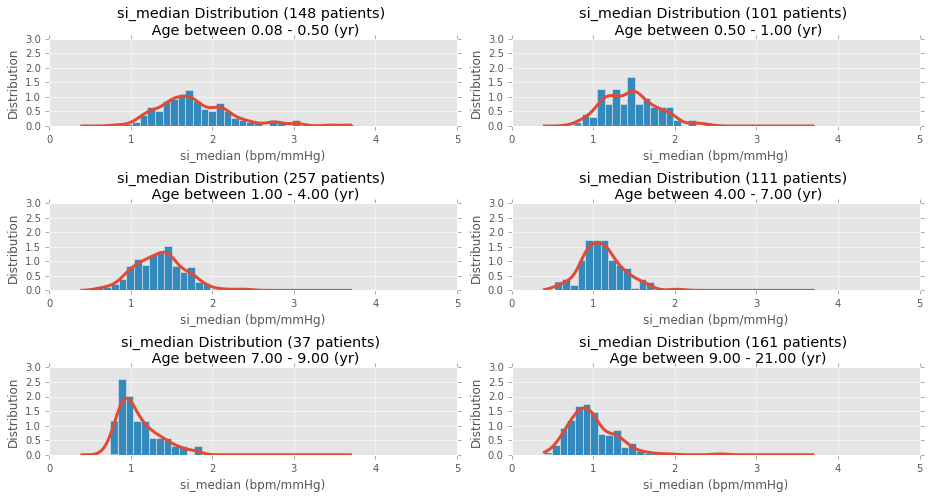

Adjust X/Y limits? (y/n)n
best bandwidth: 0.129154966501


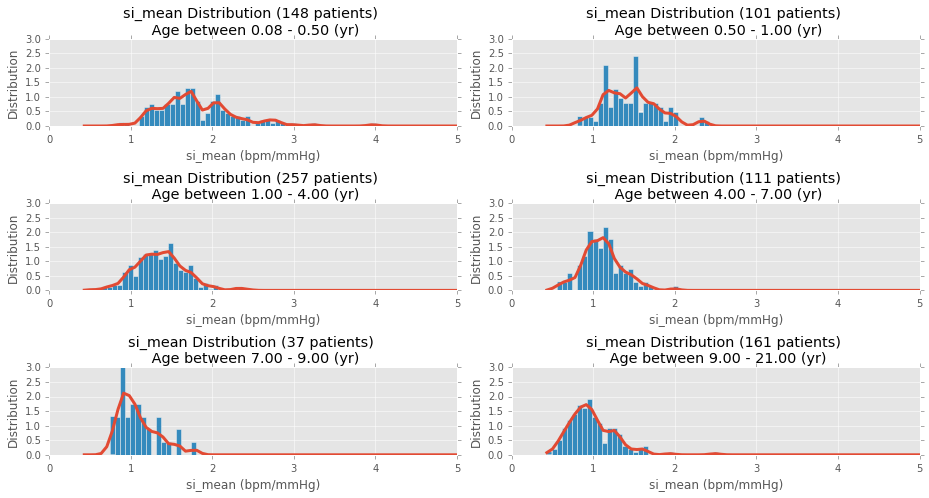

Adjust X/Y limits? (y/n)n
best bandwidth: 0.16681005372


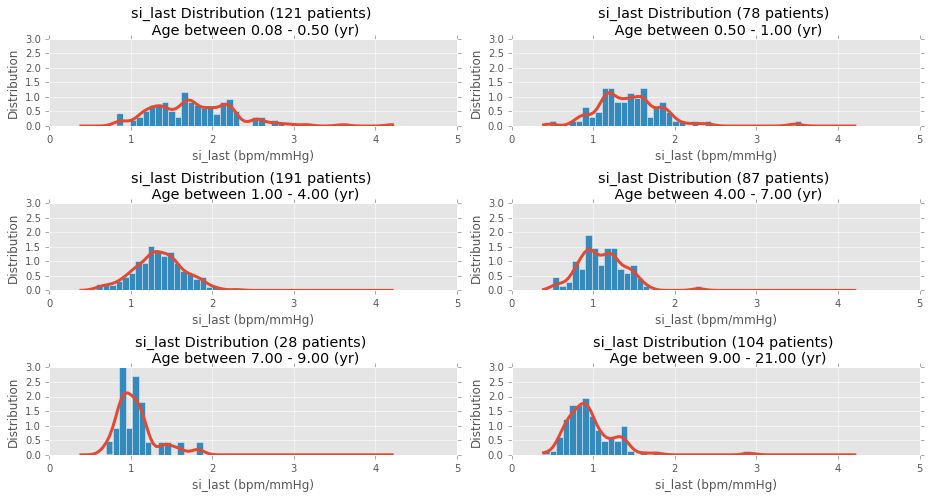

Adjust X/Y limits? (y/n)n
best bandwidth: 0.1


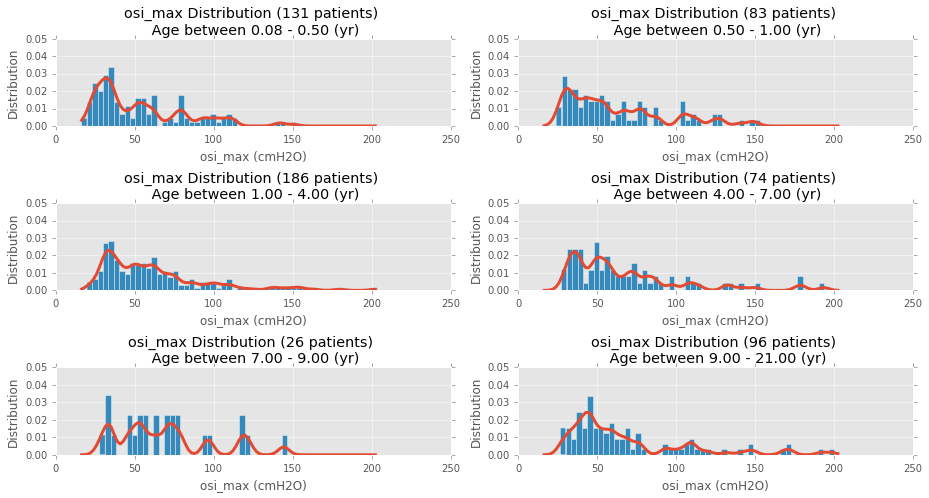

Adjust X/Y limits? (y/n)n
best bandwidth: 0.215443469003


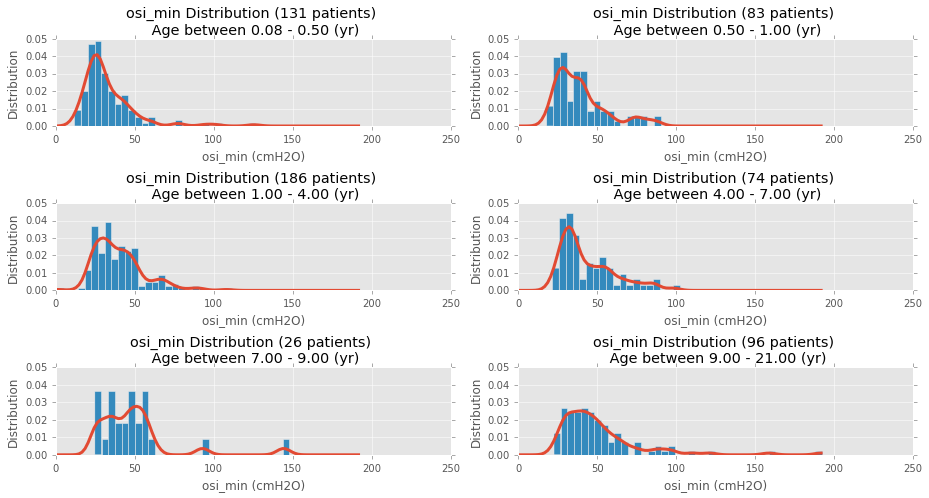

Adjust X/Y limits? (y/n)n
best bandwidth: 0.129154966501


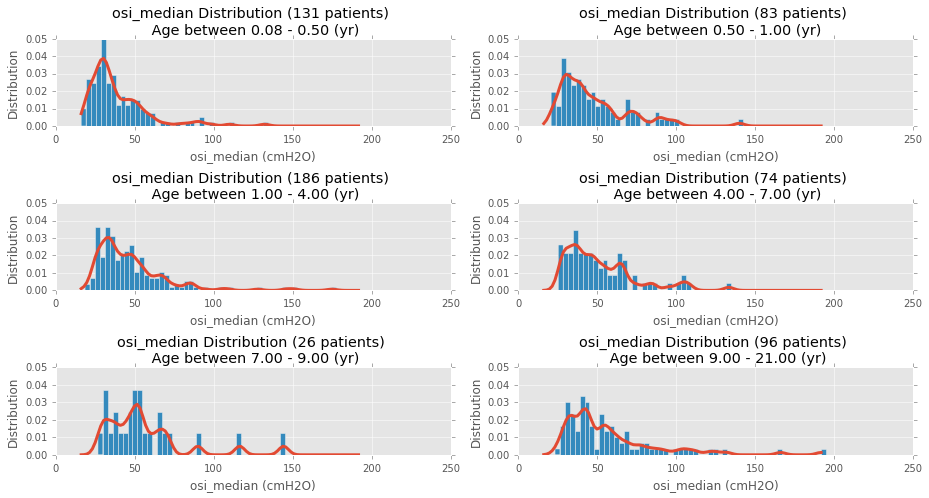

Adjust X/Y limits? (y/n)n
best bandwidth: 0.129154966501


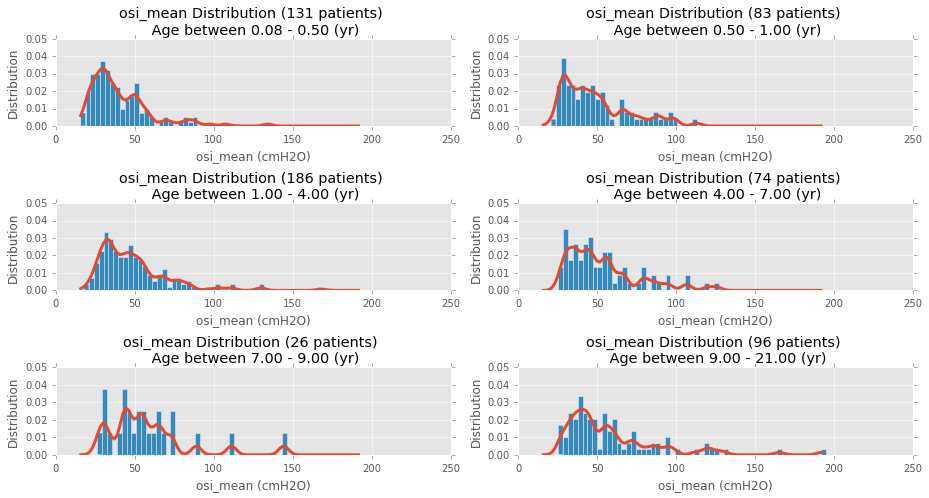

Adjust X/Y limits? (y/n)n
best bandwidth: 0.129154966501


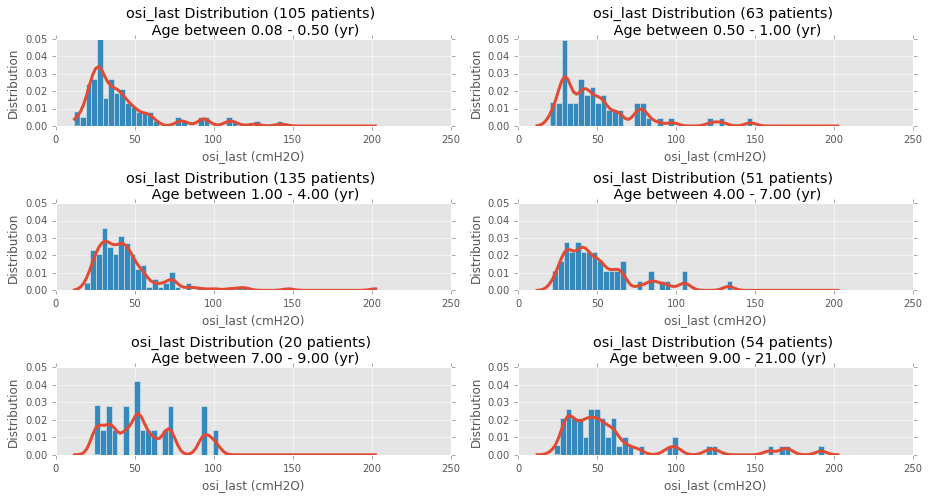

Adjust X/Y limits? (y/n)n
best bandwidth: 0.129154966501


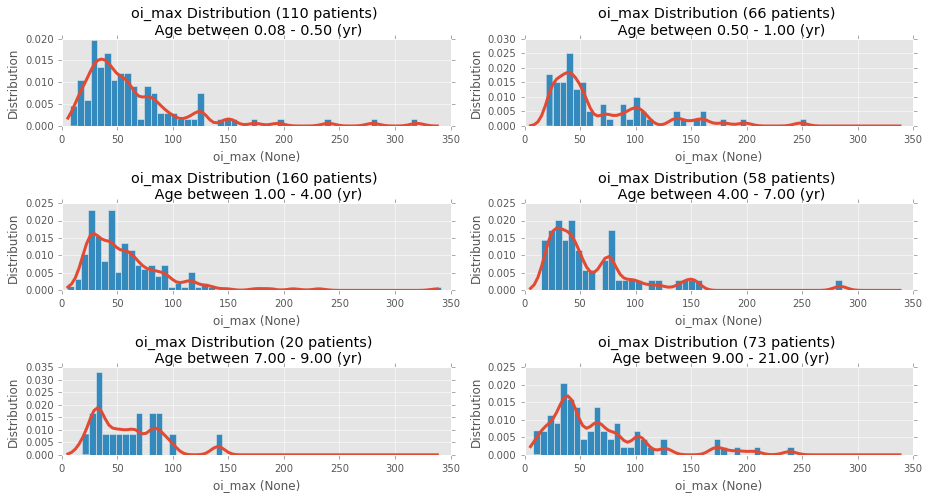

Adjust X/Y limits? (y/n)y
x-axis limit? (llim, hlim)(0,350)
y-axis limit? (llim, hlim)(0,0.035)
best bandwidth: 0.16681005372


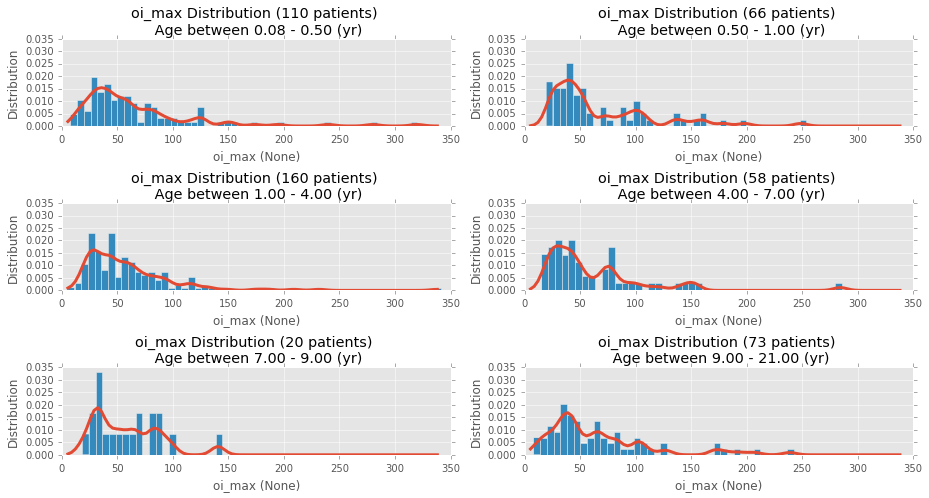

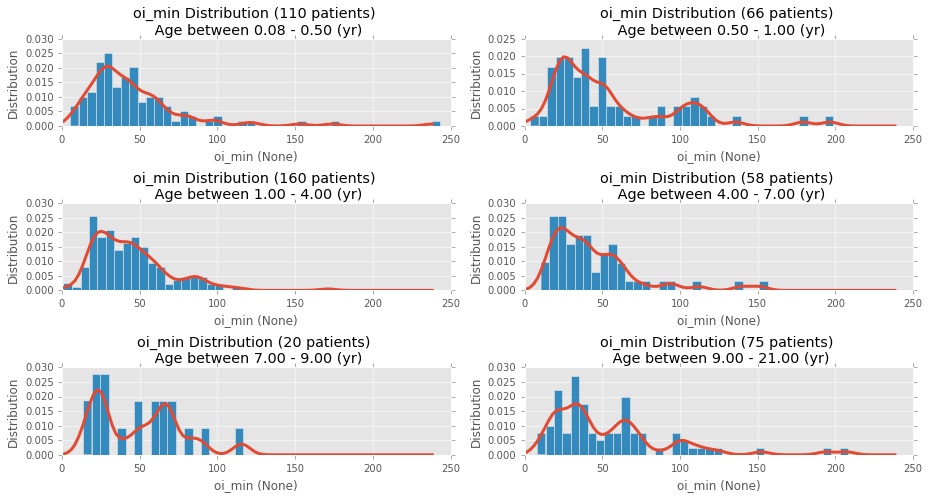

Adjust X/Y limits? (y/n)y
x-axis limit? (llim, hlim)(0,350)
y-axis limit? (llim, hlim)(0,0.035)
best bandwidth: 0.129154966501


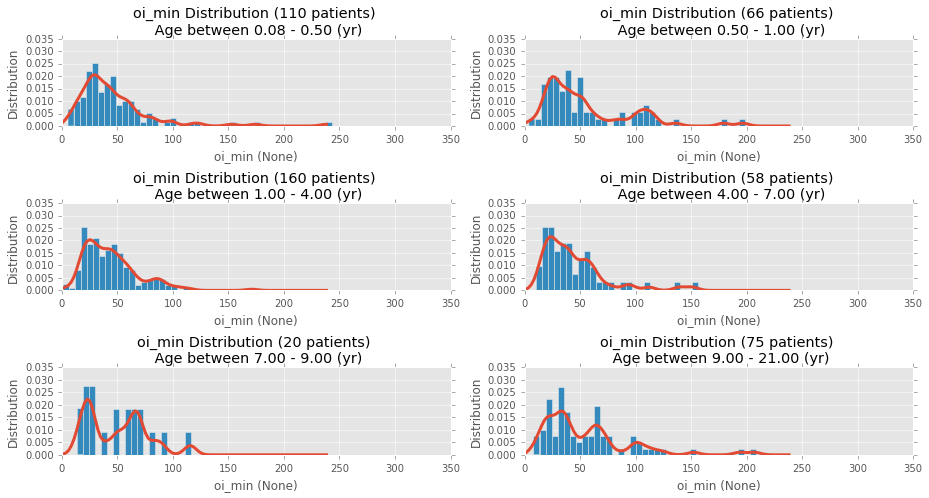

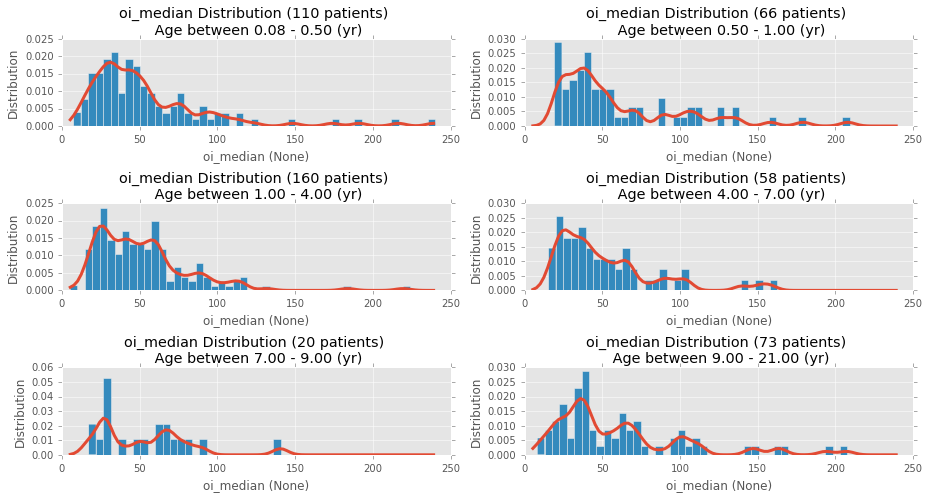

Adjust X/Y limits? (y/n)y
x-axis limit? (llim, hlim)(0,350)
y-axis limit? (llim, hlim)(0,0.035)
best bandwidth: 0.129154966501


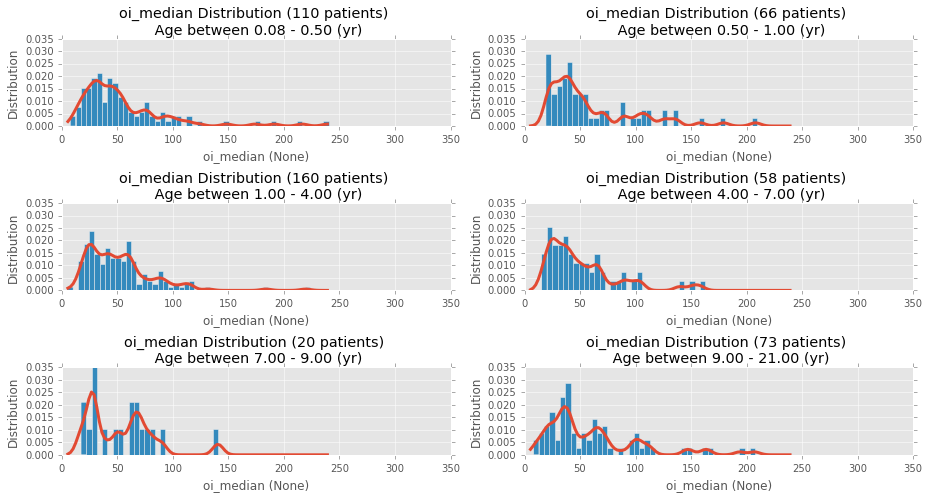

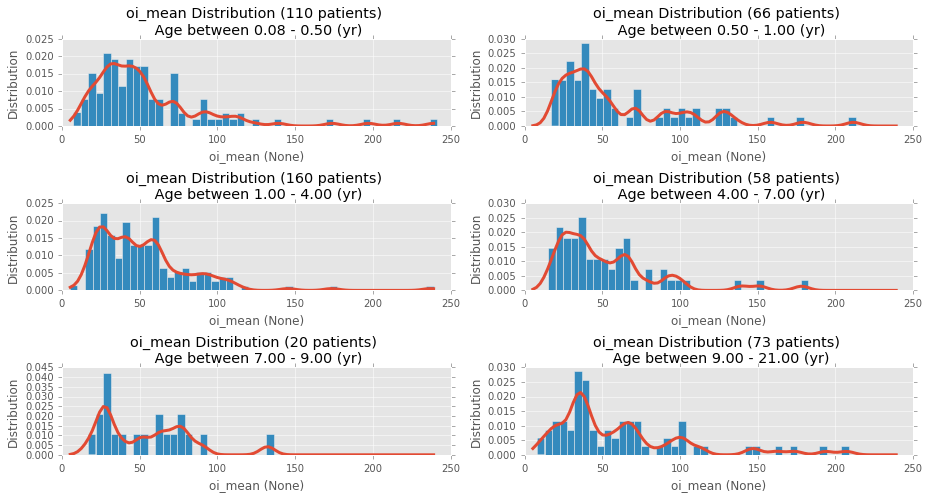

Adjust X/Y limits? (y/n)y
x-axis limit? (llim, hlim)(0,350)
y-axis limit? (llim, hlim)(0,0.035)
best bandwidth: 0.129154966501


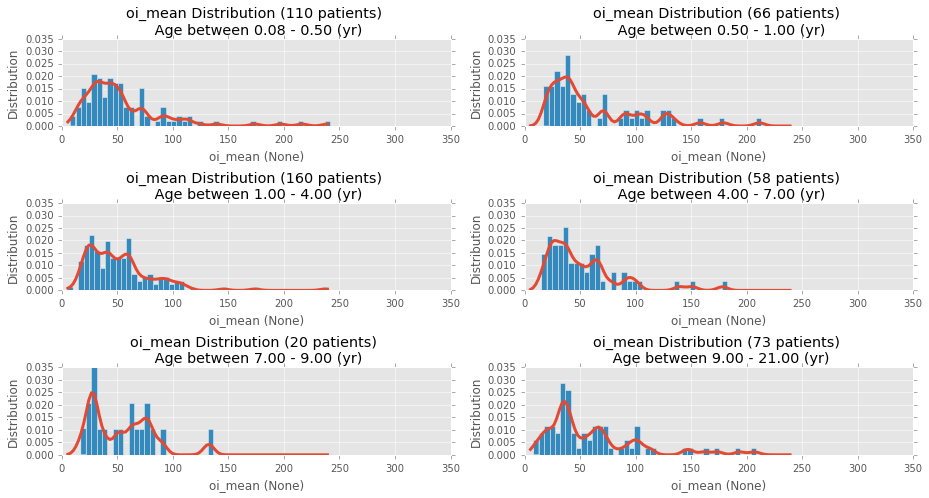

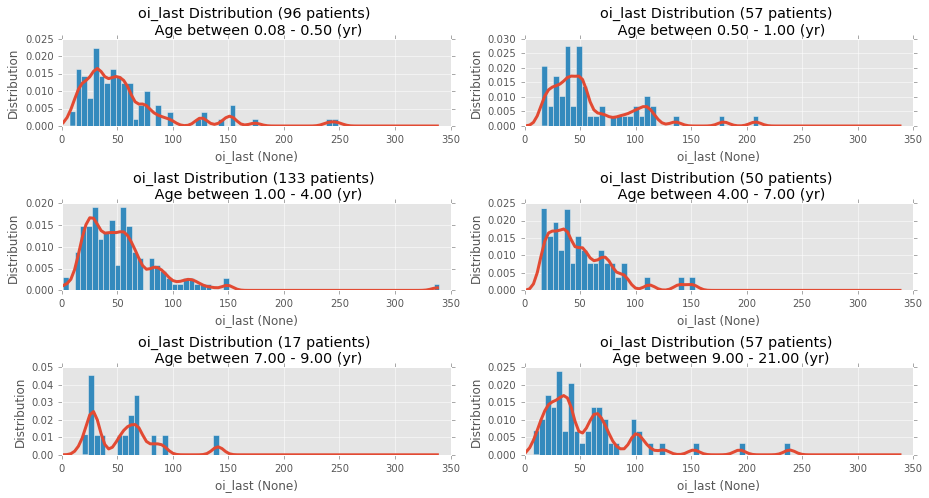

Adjust X/Y limits? (y/n)y
x-axis limit? (llim, hlim)(0,350)
y-axis limit? (llim, hlim)(0,0.035)


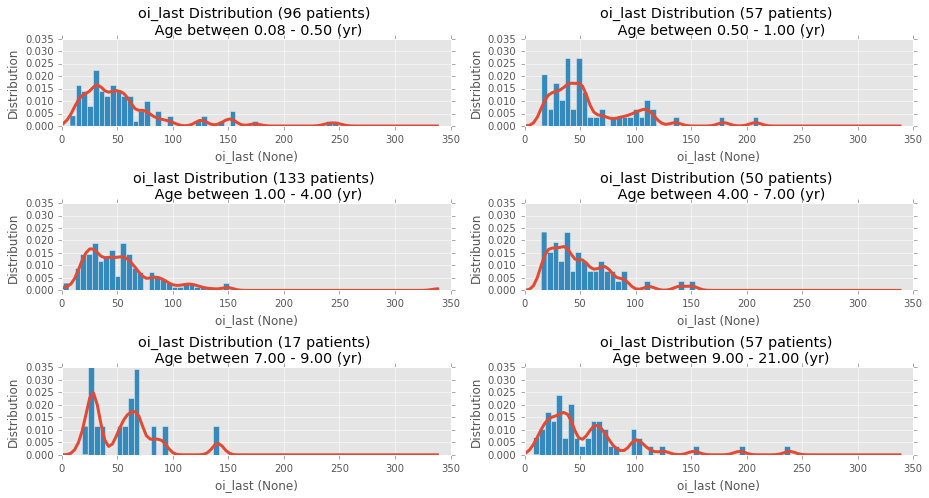

In [51]:
# Get distribution from the I/O matrix
reload(paki)
plt.ion
dbname = 'stm'

# _age_lim = [(1/12.,1/2.), (1/2., 1.), (1., 4.), (4., 7.), (7., 9.), (9., 21.)]
io_onset_aki = pd.read_pickle(os.path.join(os.path.dirname("__file__"), "io_stm2", "stm_onset_io_tlag012_twin006_aki.pkl"))
io_onset_con = pd.read_pickle(os.path.join(os.path.dirname("__file__"), "io_stm2", "stm_onset_io_tlag012_twin006_con.pkl"))
_io_onset = pd.concat([io_onset_aki, io_onset_con])
try:
    _io_onset = _io_onset.drop(['race_unique'], axis=1)
except:
    pass

# ft_to_corr = ['lactic_acid', 'creatinine', 'glucose', 'albumin']
ft_to_corr = ['si', 'osi', 'oi']
suffix = ['max', 'min', 'median', 'mean','last']
ft_full = [ft+"_"+suff for ft in ft_to_corr for suff in suffix]
ft_default = ['patient_id', 'encounter_id', 'age', 'sex', 'AKI_stage']
ft_full.extend(ft_default)

_io_onset = _io_onset.loc[:, ft_full]

for ft in _io_onset.columns:
    if 'lactic_acid' in ft:
        _io_onset[ft] = _io_onset[ft]*9.009        
    elif 'creatinine' in ft:
        _io_onset[ft] = _io_onset[ft]*0.01131
    elif 'glucose' in ft:
        _io_onset[ft] = _io_onset[ft]*18.0182
    elif 'albumin' in ft:
        _io_onset[ft] = _io_onset[ft]*0.1        
    

# Load the value/pdf dynamic range for each item
xlim_all = list()
ylim_all = list()
predictors = [ft for ft in _io_onset.columns if ft not in ['age', 'sex', 'encounter_id', 'AKI_stage', 'patient_id']]
for item in predictors:
    label = item[:item.rfind("_")]
#     print(label)
    xlim = chartitem.val_lim[chartitem.label==label].unique()
    ylim = chartitem.pdf_lim[chartitem.label==label].unique()
    if ~pd.isnull(xlim):
        eval("xlim_all.append({})".format(xlim[0]))
    else:
        xlim_all.append((None, None))
    if ~pd.isnull(ylim):
        eval("ylim_all.append({})".format(ylim[0]))
    else:
        ylim_all.append((None, None))
        

# paki.getDistIOmat(_io_onset, 'onset', age_lim=_age_lim, sex=None, xlim=xlim_all, ylim=ylim_all, 
#                   dump_fig=True, dbstring=dbname)
paki.getDistIOmat(_io_onset, 'onset', age_lim=_age_lim, sex=None, xlim=xlim_all, ylim=ylim_all, 
                  dump_fig=True, dbstring=dbname)

best bandwidth: 0.1


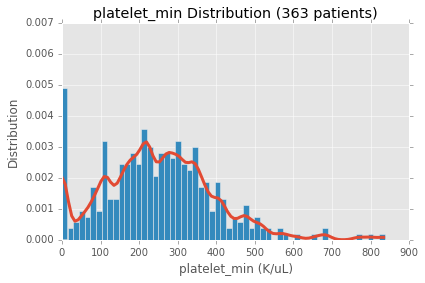

best bandwidth: 0.35938136638


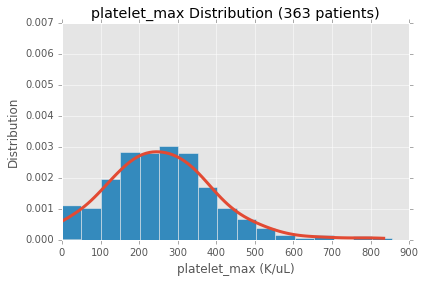

best bandwidth: 0.35938136638


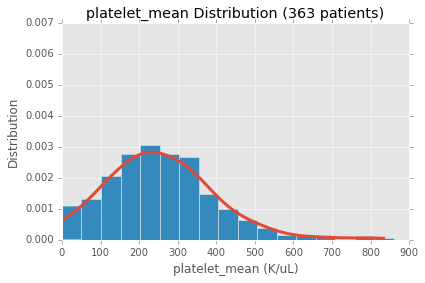

best bandwidth: 0.35938136638


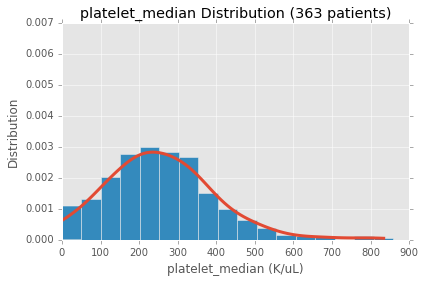

best bandwidth: 0.1


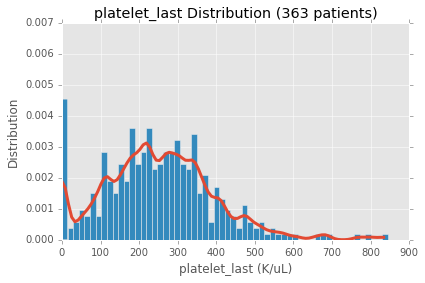

best bandwidth: 0.1


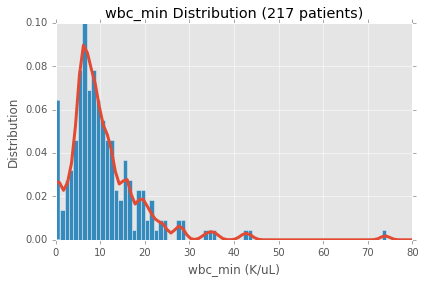

best bandwidth: 0.16681005372


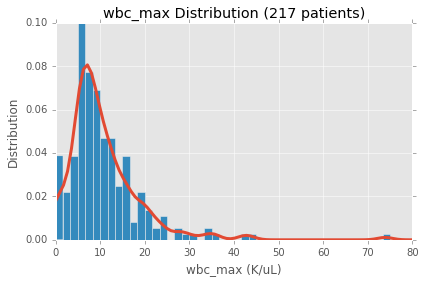

best bandwidth: 0.1


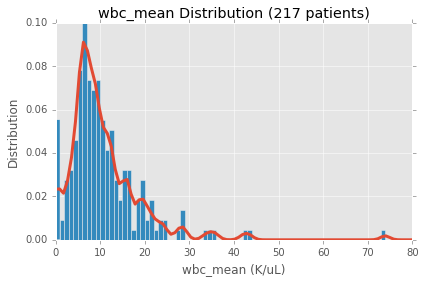

best bandwidth: 0.1


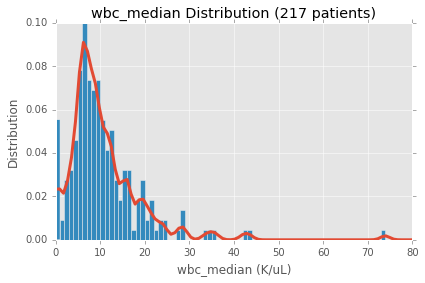

best bandwidth: 0.129154966501


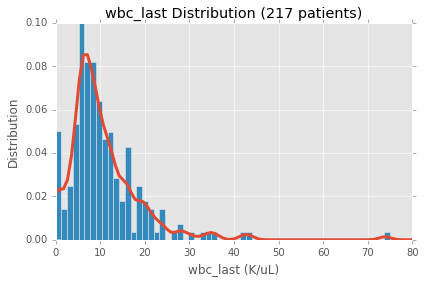

best bandwidth: 0.278255940221


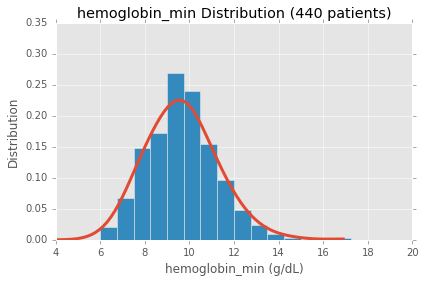

best bandwidth: 0.215443469003


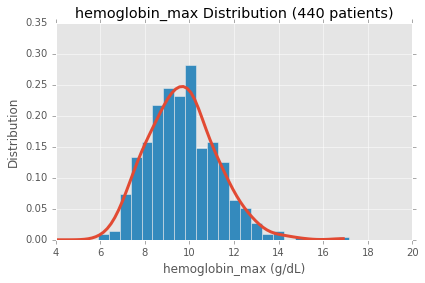

best bandwidth: 0.278255940221


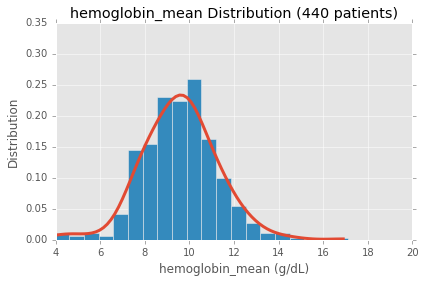

best bandwidth: 0.278255940221


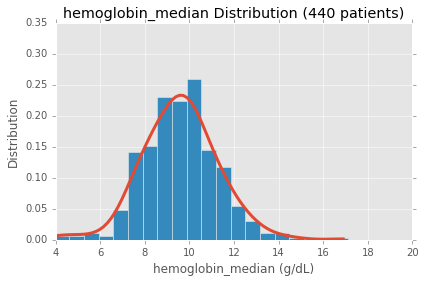

best bandwidth: 0.278255940221


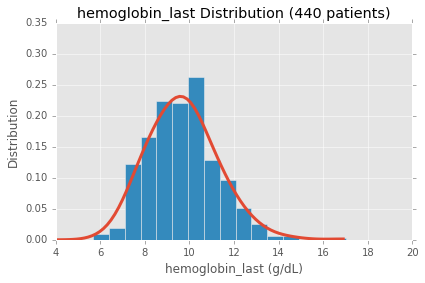

best bandwidth: 0.1


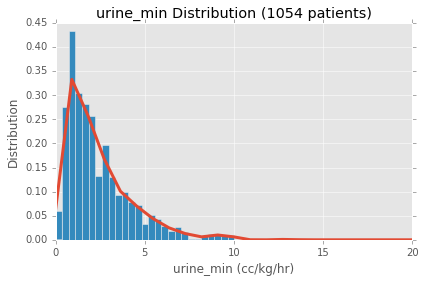

best bandwidth: 0.1


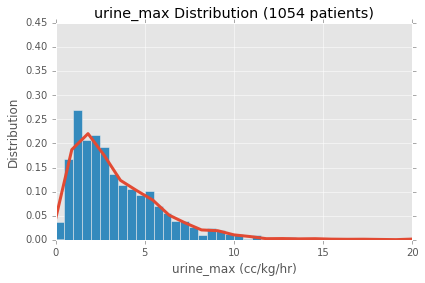

best bandwidth: 0.1


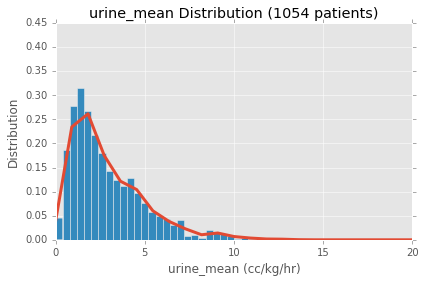

best bandwidth: 0.1


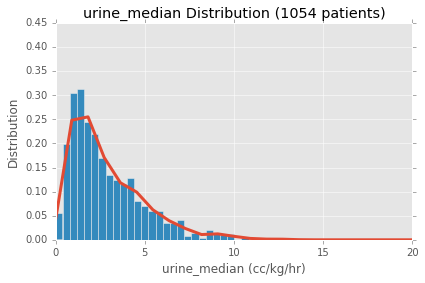

best bandwidth: 0.1


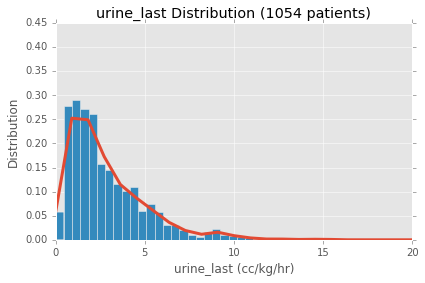

best bandwidth: 0.16681005372


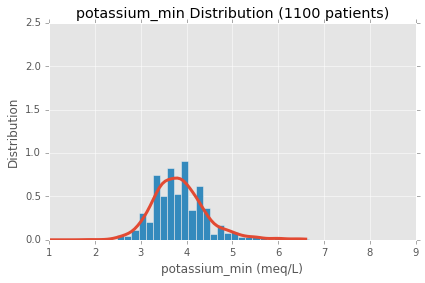

best bandwidth: 0.16681005372


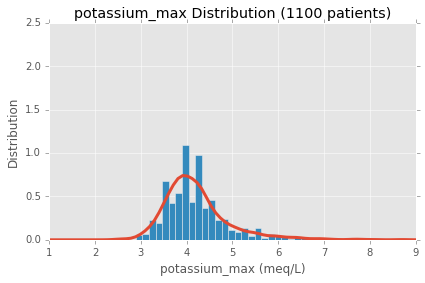

best bandwidth: 0.215443469003


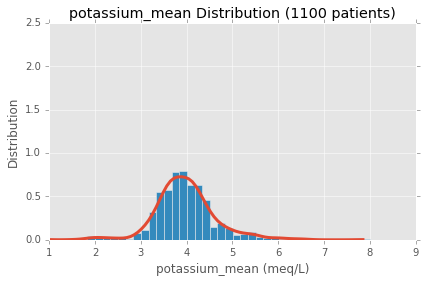

best bandwidth: 0.16681005372


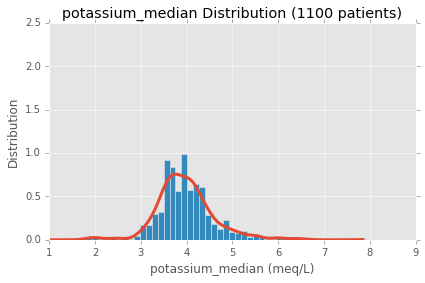

best bandwidth: 0.16681005372


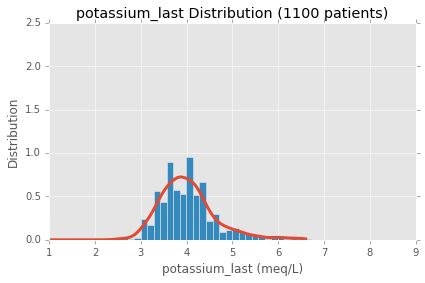

best bandwidth: 0.215443469003


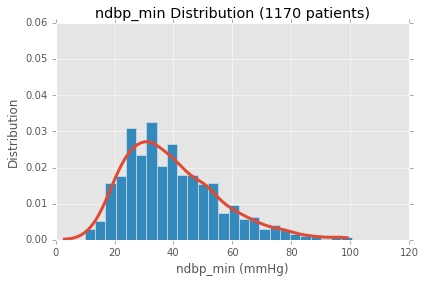

best bandwidth: 0.215443469003


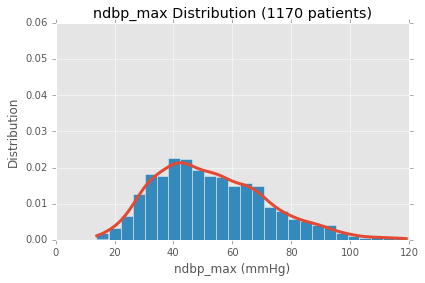

best bandwidth: 0.16681005372


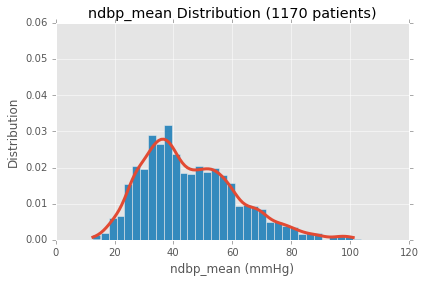

best bandwidth: 0.16681005372


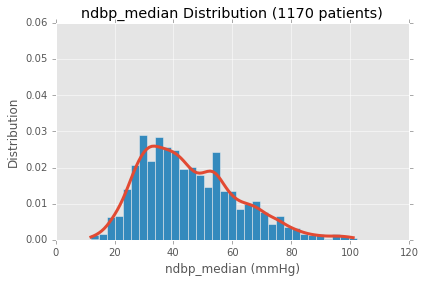

best bandwidth: 0.16681005372


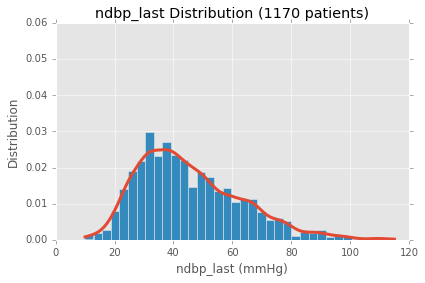

best bandwidth: 0.215443469003


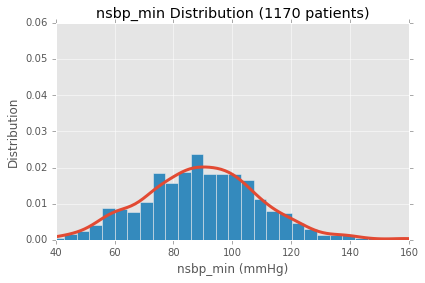

best bandwidth: 0.278255940221


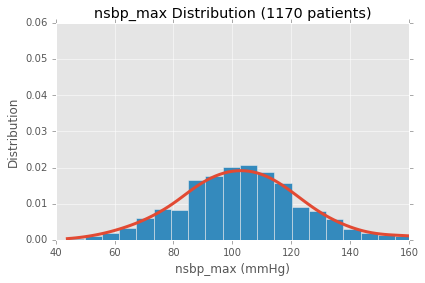

best bandwidth: 0.278255940221


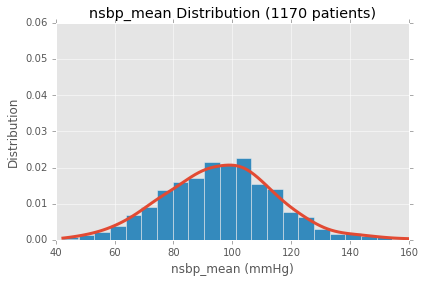

best bandwidth: 0.278255940221


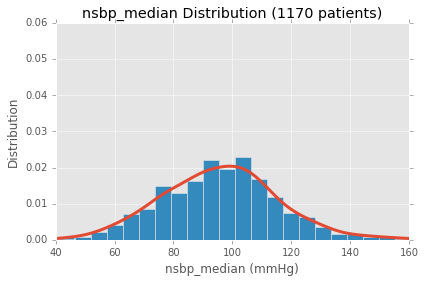

best bandwidth: 0.278255940221


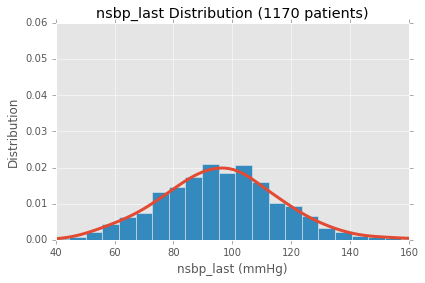

best bandwidth: 0.16681005372


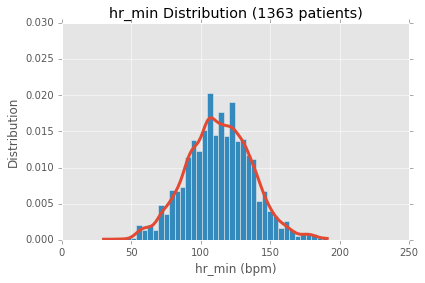

best bandwidth: 0.215443469003


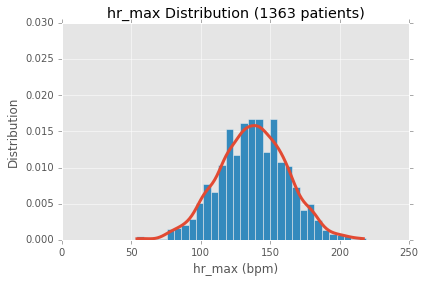

best bandwidth: 0.215443469003


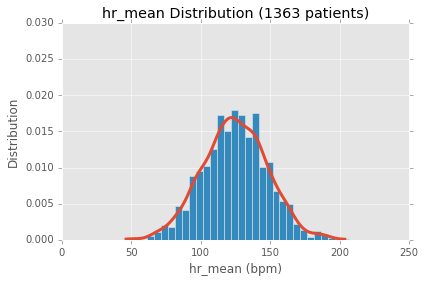

best bandwidth: 0.215443469003


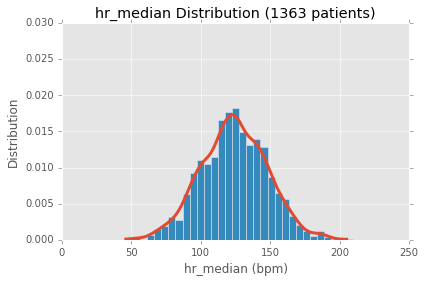

best bandwidth: 0.278255940221


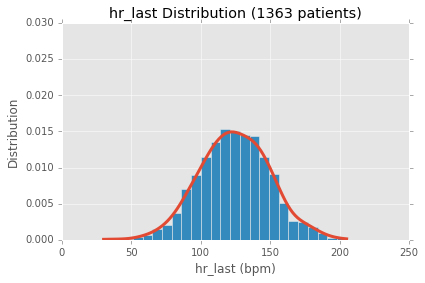

best bandwidth: 0.1


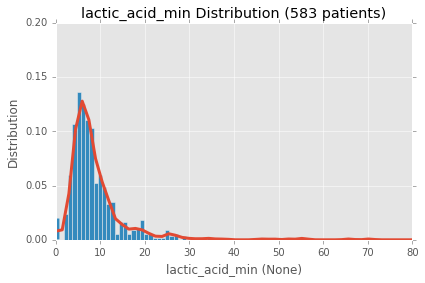

best bandwidth: 0.1


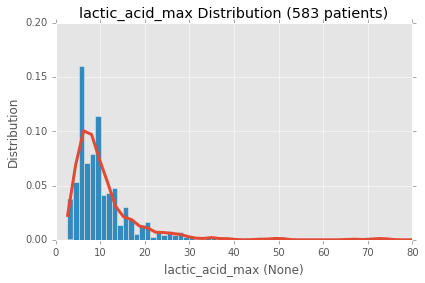

best bandwidth: 0.129154966501


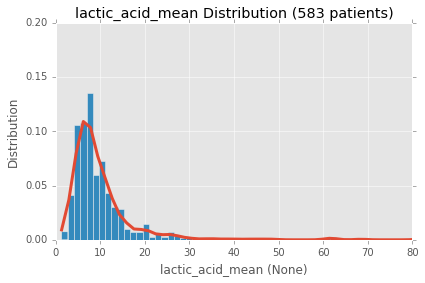

best bandwidth: 0.129154966501


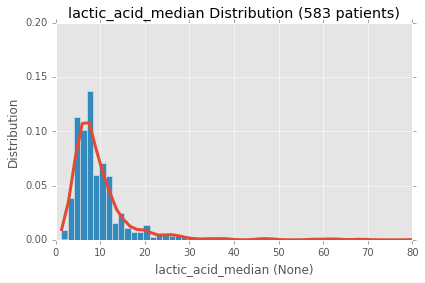

best bandwidth: 0.1


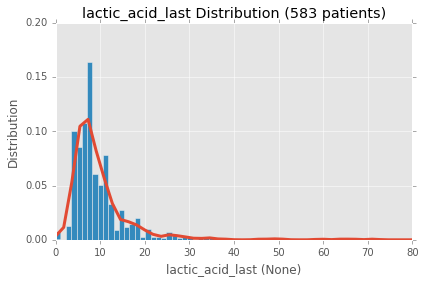

best bandwidth: 0.1


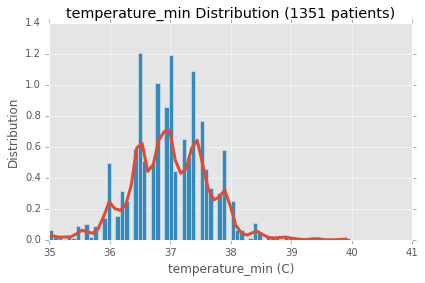

best bandwidth: 0.1


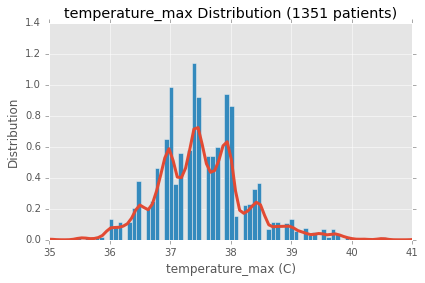

best bandwidth: 0.16681005372


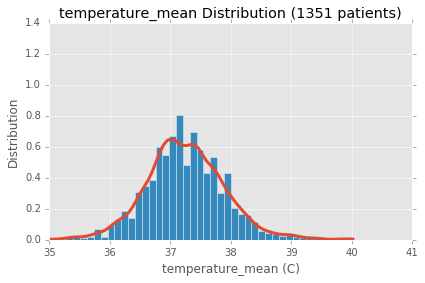

best bandwidth: 0.129154966501


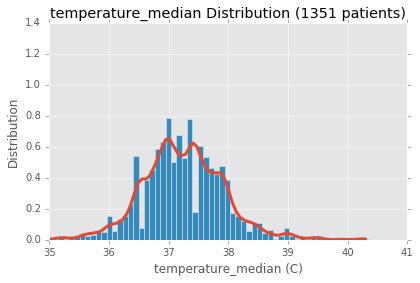

best bandwidth: 0.1


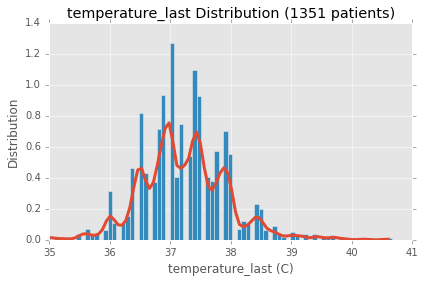

best bandwidth: 0.1


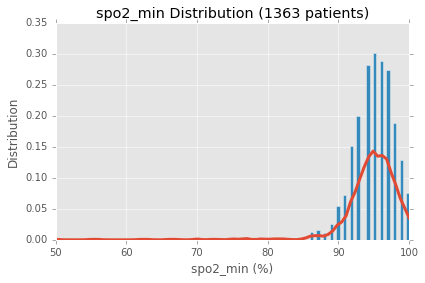

best bandwidth: 0.1


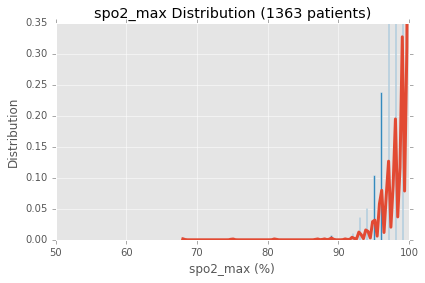

best bandwidth: 0.1


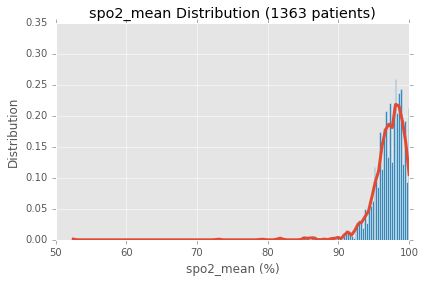

best bandwidth: 0.1


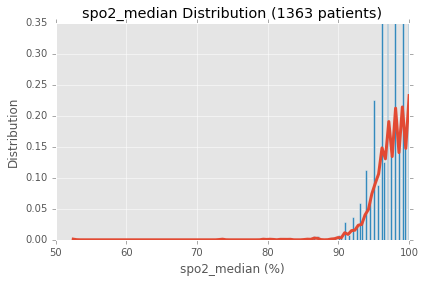

best bandwidth: 0.1


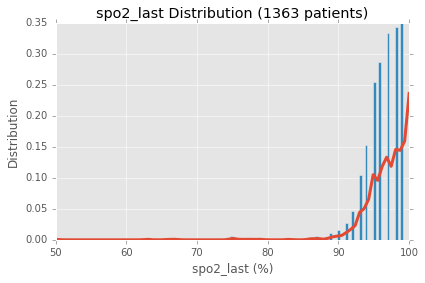

best bandwidth: 0.35938136638


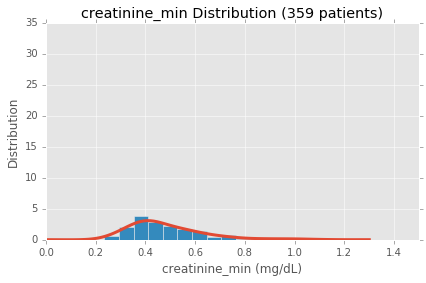

best bandwidth: 0.35938136638


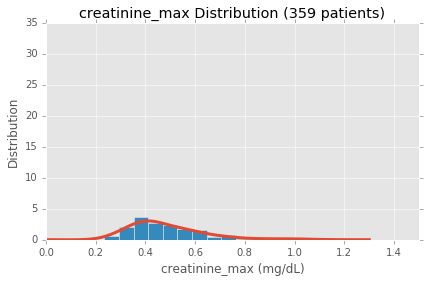

best bandwidth: 0.35938136638


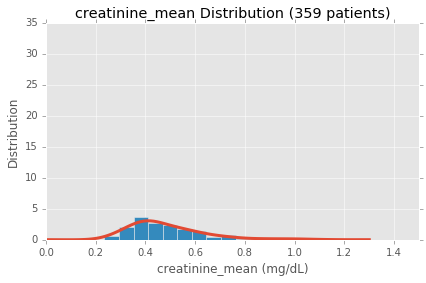

best bandwidth: 0.35938136638


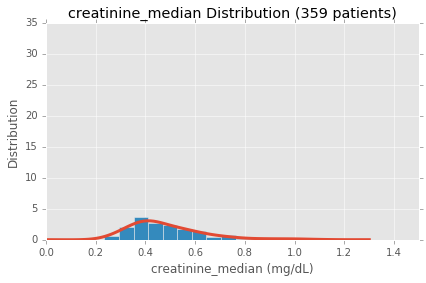

best bandwidth: 0.35938136638


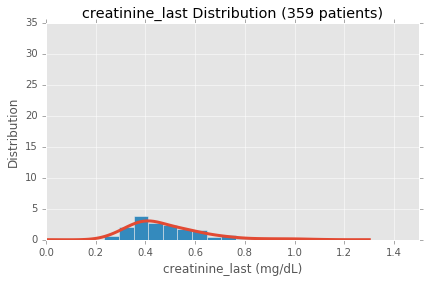

best bandwidth: 0.35938136638


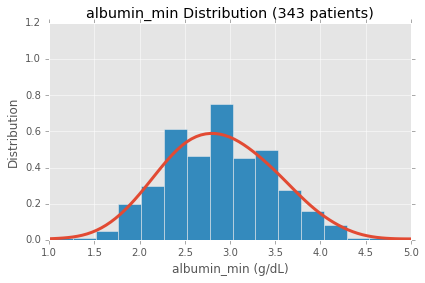

best bandwidth: 0.35938136638


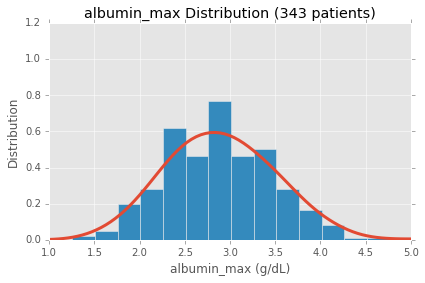

best bandwidth: 0.35938136638


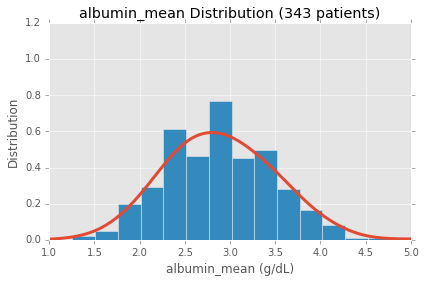

best bandwidth: 0.35938136638


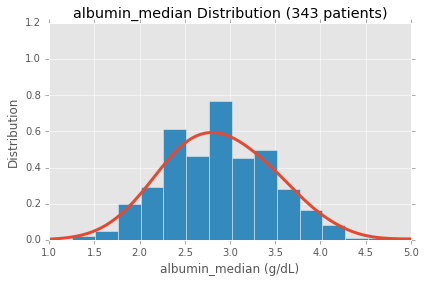

best bandwidth: 0.35938136638


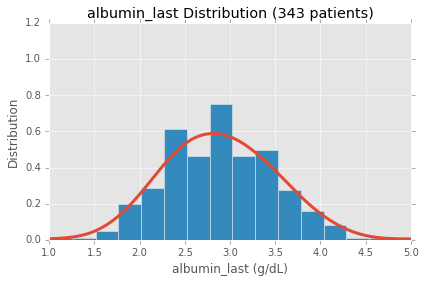

best bandwidth: 0.1


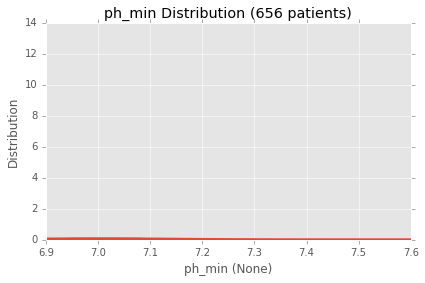

best bandwidth: 0.1


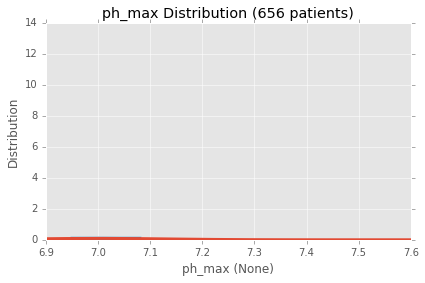

best bandwidth: 0.1


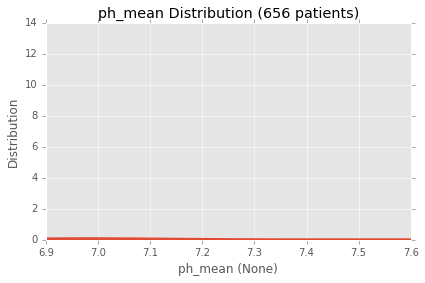

best bandwidth: 0.1


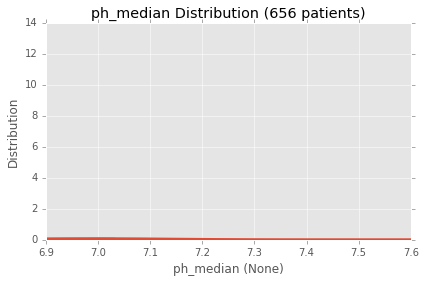

best bandwidth: 0.1


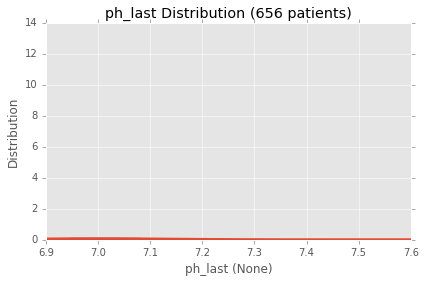

best bandwidth: 0.278255940221


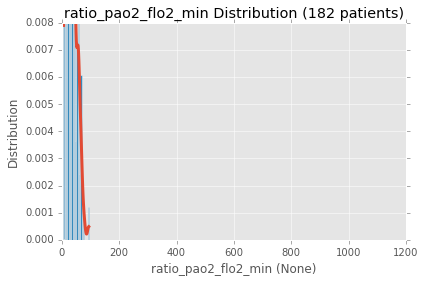

best bandwidth: 0.215443469003


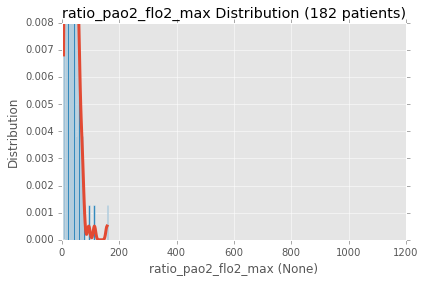

best bandwidth: 0.35938136638


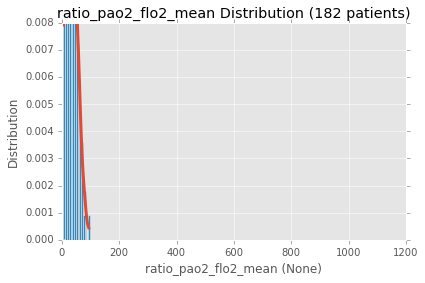

best bandwidth: 0.278255940221


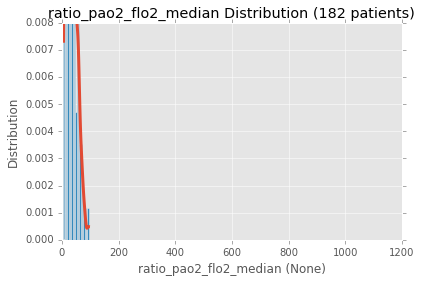

best bandwidth: 0.278255940221


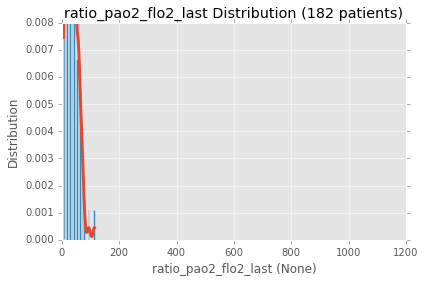

best bandwidth: 0.129154966501


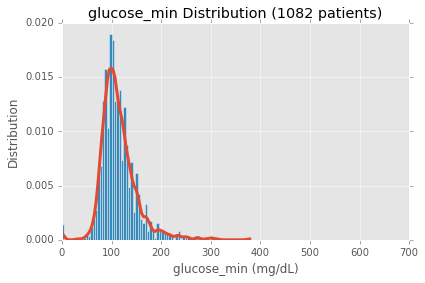

best bandwidth: 0.129154966501


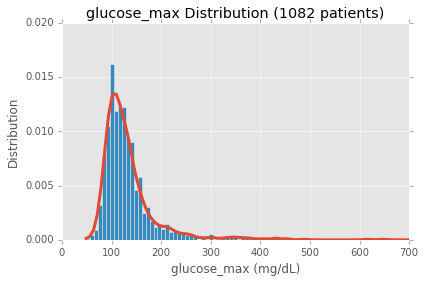

best bandwidth: 0.16681005372


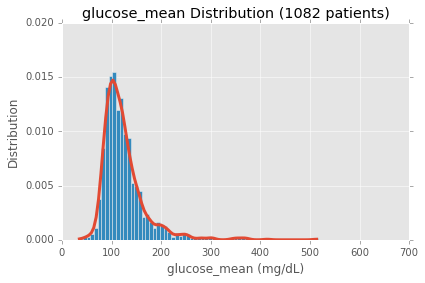

best bandwidth: 0.16681005372


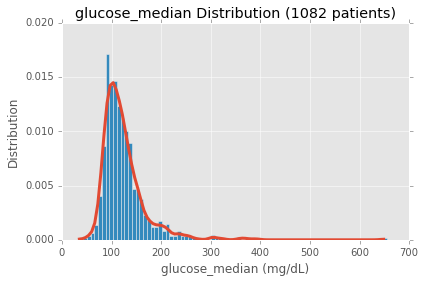

best bandwidth: 0.129154966501


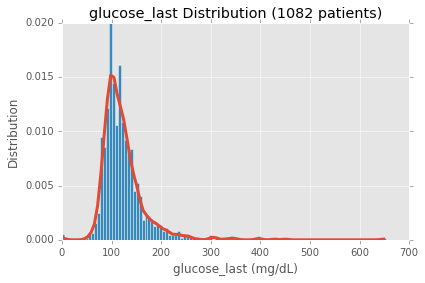

best bandwidth: 0.16681005372


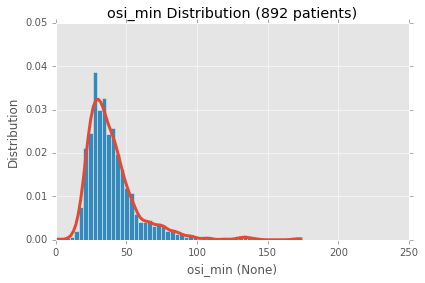

best bandwidth: 0.129154966501


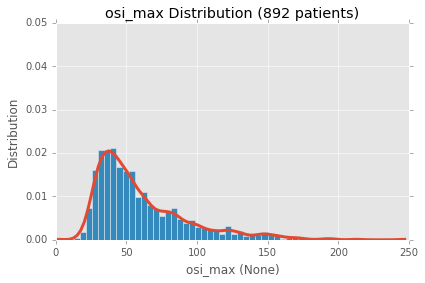

best bandwidth: 0.16681005372


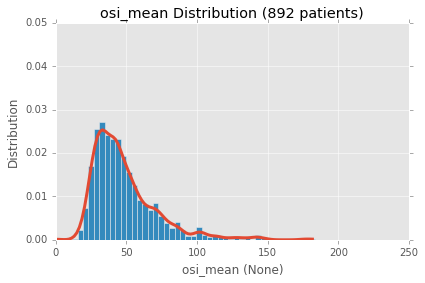

best bandwidth: 0.129154966501


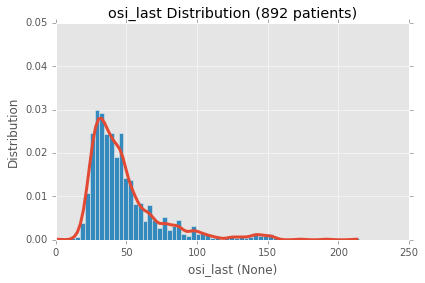

best bandwidth: 0.16681005372


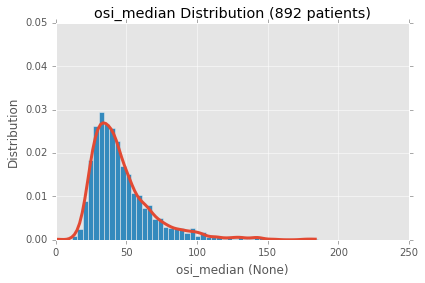

best bandwidth: 0.1


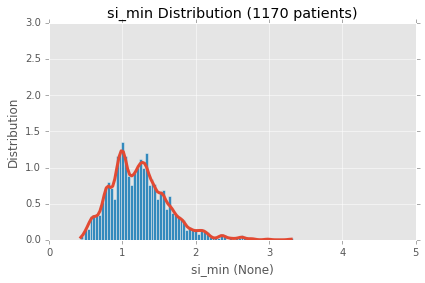

best bandwidth: 0.16681005372


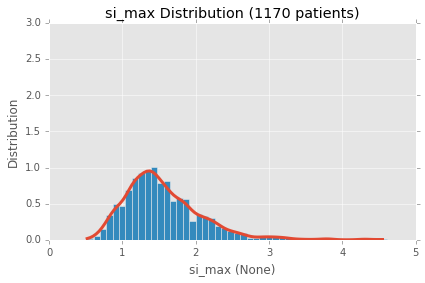

best bandwidth: 0.1


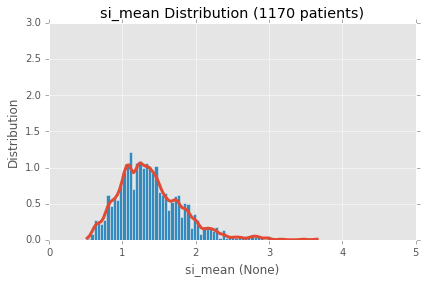

best bandwidth: 0.16681005372


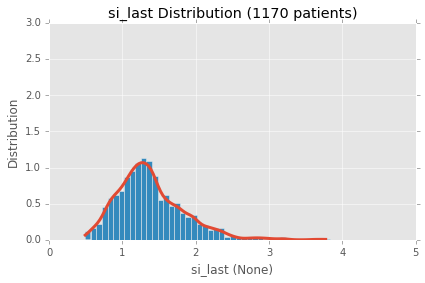

best bandwidth: 0.129154966501


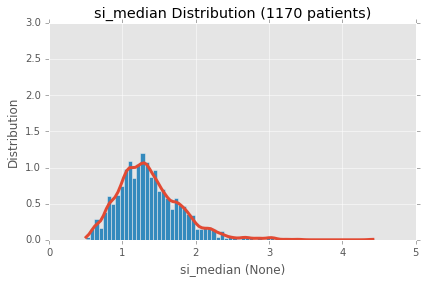

best bandwidth: 0.1


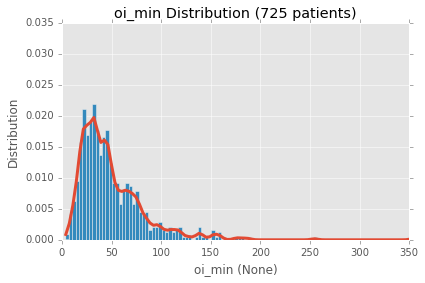

best bandwidth: 0.1


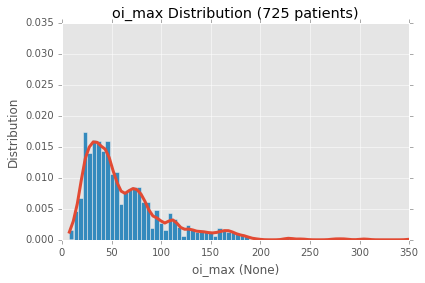

best bandwidth: 0.1


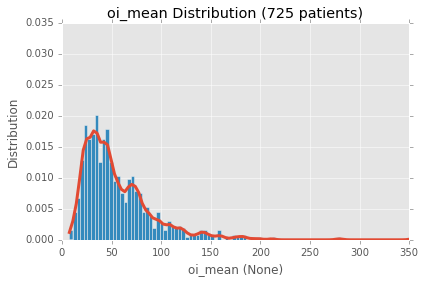

best bandwidth: 0.1


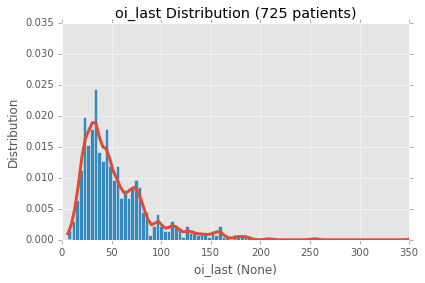

best bandwidth: 0.1


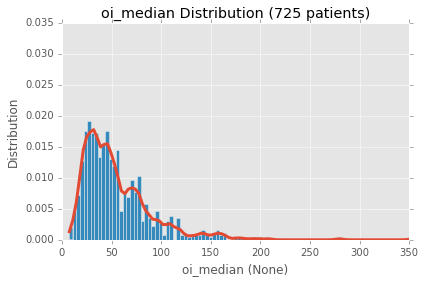

In [8]:
reload(paki)
plt.ion
dbname = 'stm'

# _age_lim = [(1/12.,1/2.), (1/2., 1.), (1., 4.), (4., 7.), (7., 9.), (9., 21.)]
io_onset_aki = pd.read_pickle(os.path.join(os.path.dirname("__file__"), "io_stm4", "stm_onset_io_tlag012_twin006_aki.pkl"))
io_onset_con = pd.read_pickle(os.path.join(os.path.dirname("__file__"), "io_stm4", "stm_onset_io_tlag012_twin006_con.pkl"))
_io_onset = pd.concat([io_onset_aki, io_onset_con])
try:
    _io_onset = _io_onset.drop(['race_unique'], axis=1)
except:
    pass

# ft_to_corr = ['si', 'osi', 'oi']
# suffix = ['max', 'min', 'median', 'mean','last']
# ft_full = [ft+"_"+suff for ft in ft_to_corr for suff in suffix]
# ft_default = ['patient_id', 'encounter_id', 'age', 'sex', 'AKI_stage']
# ft_full.extend(ft_default)
# _io_onset = _io_onset.loc[:, ft_full]



for ft in _io_onset.columns:
    if 'lactic_acid' in ft:
        _io_onset[ft] = _io_onset[ft]*9.009        
#     elif 'creatinine' in ft:
#         _io_onset[ft] = _io_onset[ft]*0.01131
    elif 'glucose' in ft:
        _io_onset[ft] = _io_onset[ft]*18.0182
    elif 'albumin' in ft:
        _io_onset[ft] = _io_onset[ft]*0.1
        
xlim_all = list()
ylim_all = list()
predictors = [ft for ft in _io_onset.columns if ft not in ['age', 'sex', 'encounter_id', 'AKI_stage', 'patient_id']]
for item in predictors:
    label = item[:item.rfind("_")]
#     print(label)
    xlim = chartitem.val_lim[chartitem.label==label].unique()
    ylim = chartitem.pdf_lim[chartitem.label==label].unique()
    if ~pd.isnull(xlim):
        eval("xlim_all.append({})".format(xlim[0]))
    else:
        xlim_all.append((None, None))
    if ~pd.isnull(ylim):
        eval("ylim_all.append({})".format(ylim[0]))
    else:
        ylim_all.append((None, None))
        

paki.getDistIOmat(_io_onset, 'onset', age_lim=None, sex=None, xlim=xlim_all, ylim=ylim_all, 
                  dump_fig=True, dbstring=dbname)

In [6]:
_io_onset.mean(axis=0)

patient_id                3479.865274
encounter_id              4034.756484
age                       1490.806709
AKI_stage                    0.154899
platelet_min               249.867769
platelet_max               260.393939
platelet_mean              255.460973
platelet_median            256.121212
platelet_last              251.647383
wbc_min                     10.976959
wbc_max                     11.113825
wbc_mean                    11.046006
wbc_median                  11.047235
wbc_last                    11.047465
hemoglobin_min               9.110455
hemoglobin_max               9.394773
hemoglobin_mean              9.259129
hemoglobin_median            9.272159
hemoglobin_last              9.239318
urine_min                    2.564611
urine_max                    3.728463
urine_mean                   3.116015
urine_median                 3.080503
urine_last                   3.088615
potassium_min                3.715636
potassium_max                4.170909
potassium_me

best bandwidth: 0.1


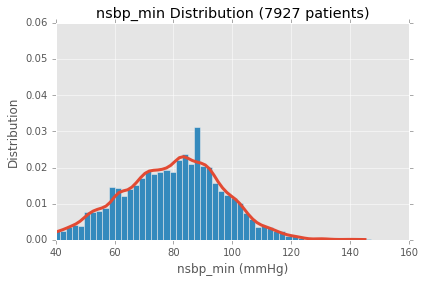

best bandwidth: 0.129154966501


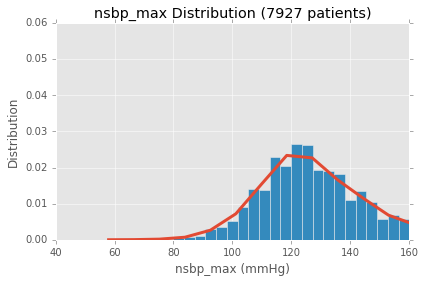

best bandwidth: 0.129154966501


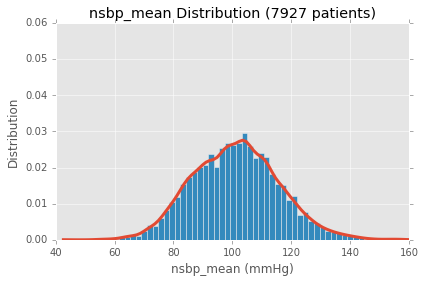

best bandwidth: 0.16681005372


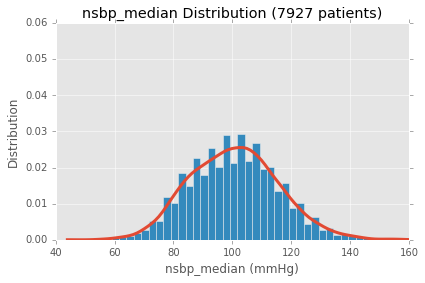

best bandwidth: 0.129154966501


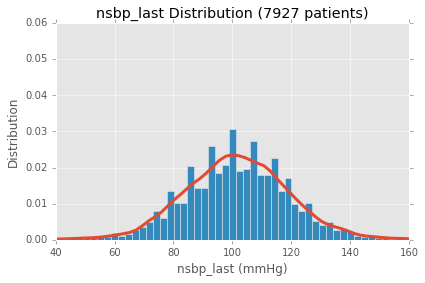

best bandwidth: 0.1


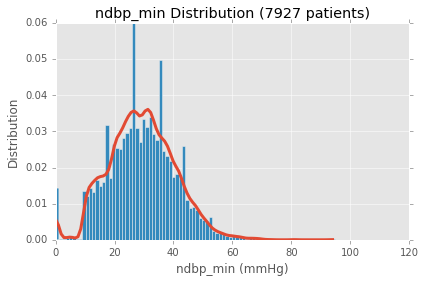

best bandwidth: 0.1


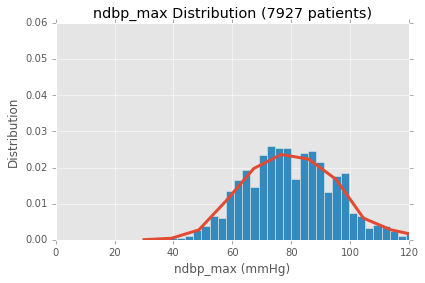

best bandwidth: 0.16681005372


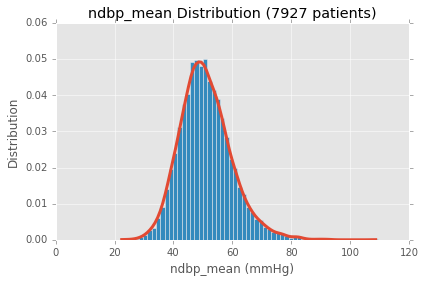

best bandwidth: 0.1


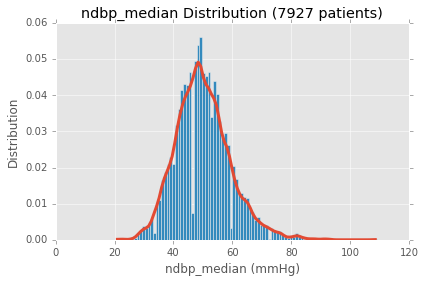

best bandwidth: 0.1


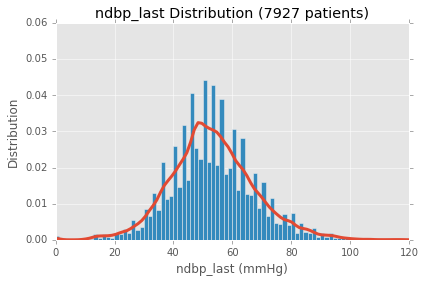

best bandwidth: 0.1


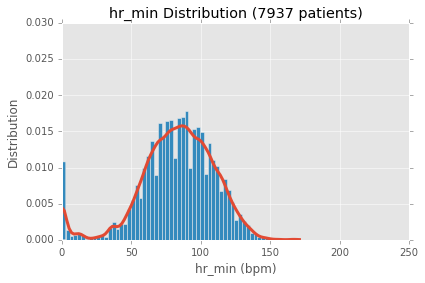

best bandwidth: 0.16681005372


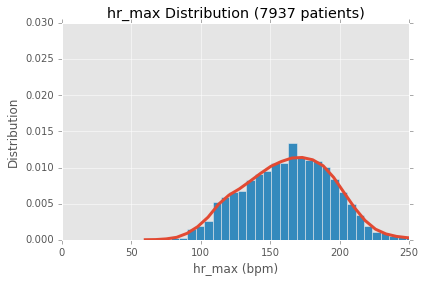

best bandwidth: 0.16681005372


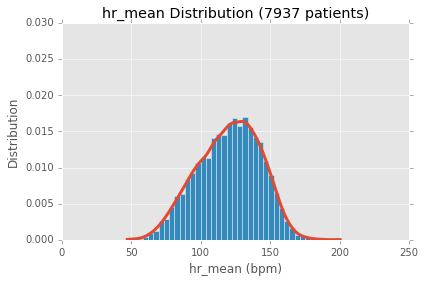

best bandwidth: 0.129154966501


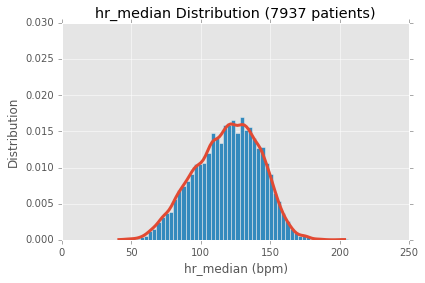

best bandwidth: 0.16681005372


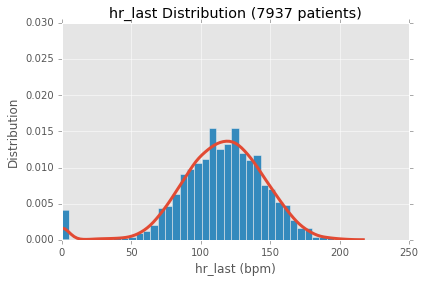

best bandwidth: 0.1


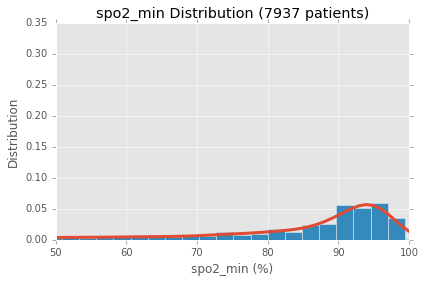

best bandwidth: 0.1


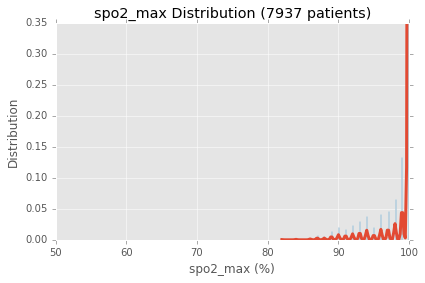

best bandwidth: 0.1


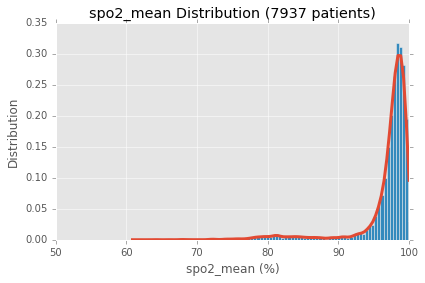

best bandwidth: 0.1


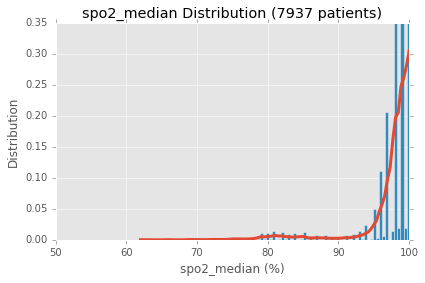

best bandwidth: 0.1


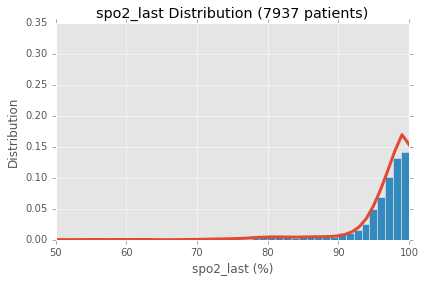

best bandwidth: 0.1


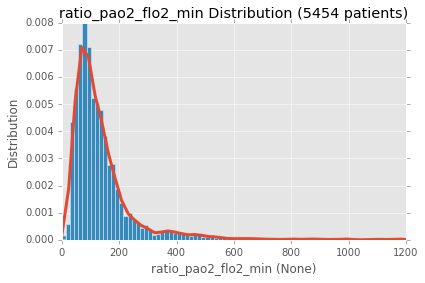

best bandwidth: 0.1


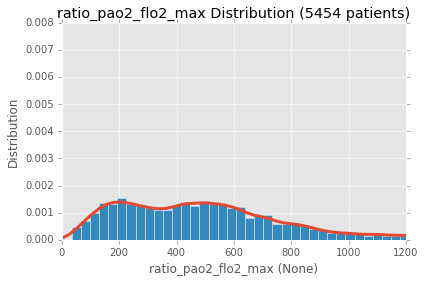

best bandwidth: 0.1


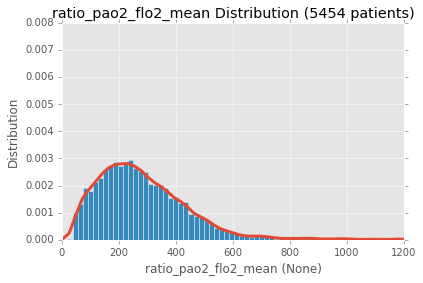

best bandwidth: 0.1


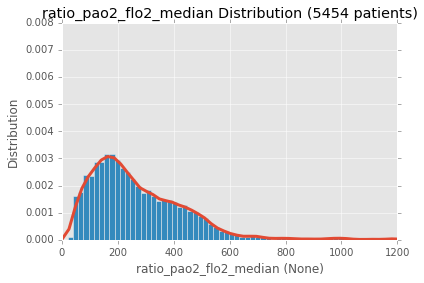

best bandwidth: 0.1


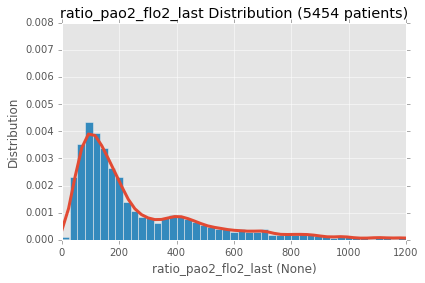

best bandwidth: 0.1


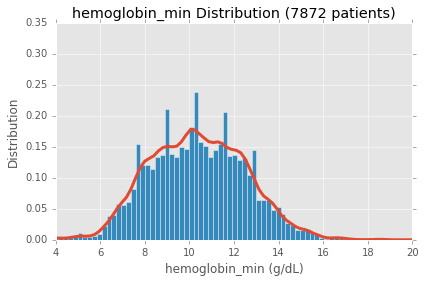

best bandwidth: 0.129154966501


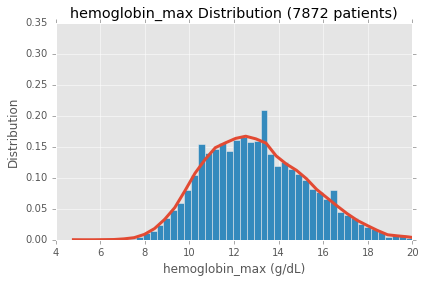

best bandwidth: 0.129154966501


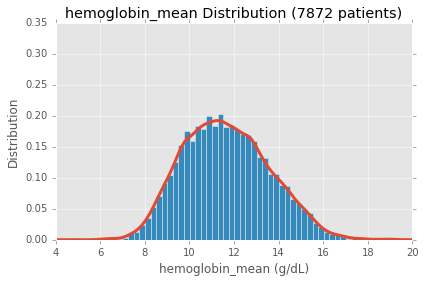

best bandwidth: 0.129154966501


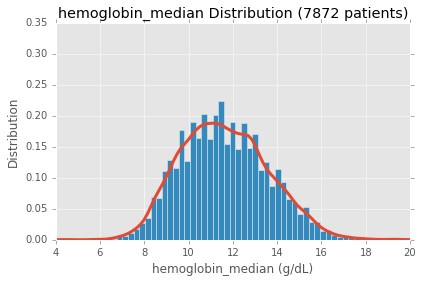

best bandwidth: 0.16681005372


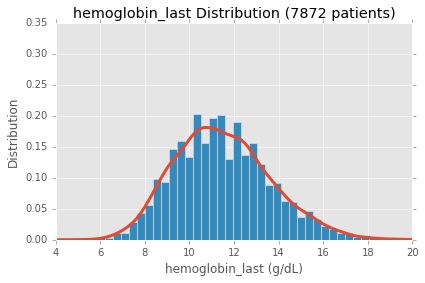

best bandwidth: 0.1


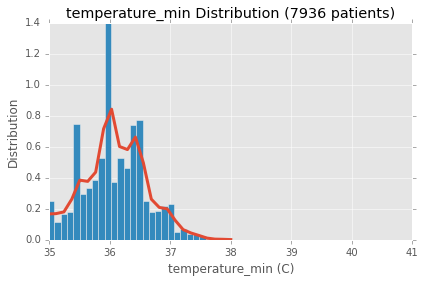

best bandwidth: 0.1


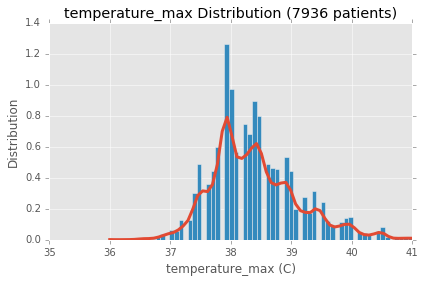

best bandwidth: 0.129154966501


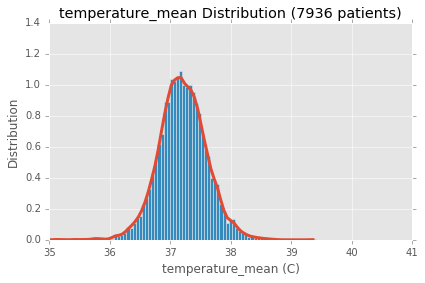

best bandwidth: 0.1


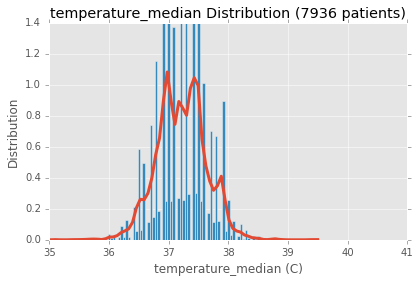

best bandwidth: 0.1


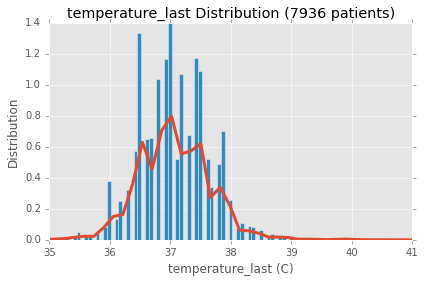

best bandwidth: 0.1


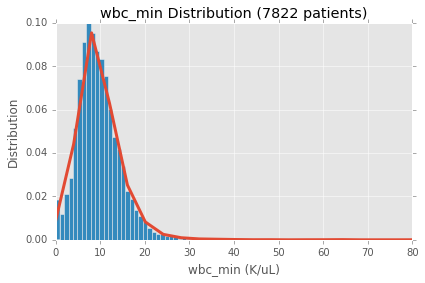

best bandwidth: 0.1


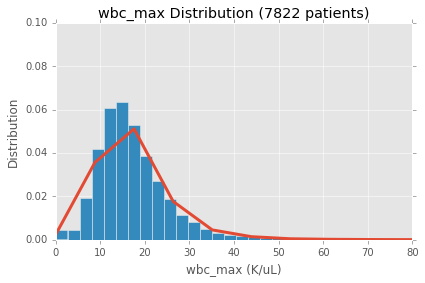

best bandwidth: 0.1


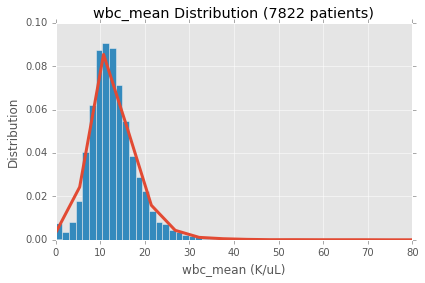

best bandwidth: 0.1


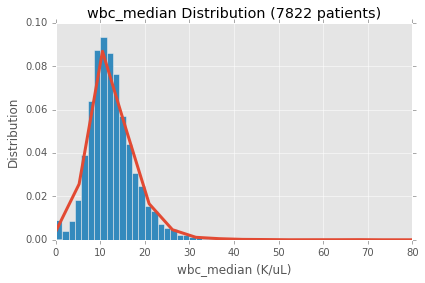

best bandwidth: 0.1


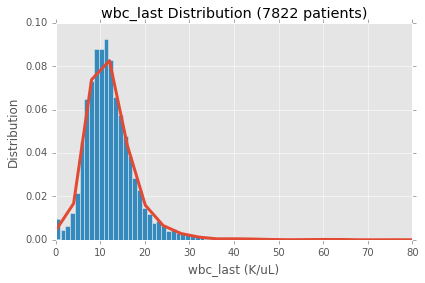

best bandwidth: 0.1


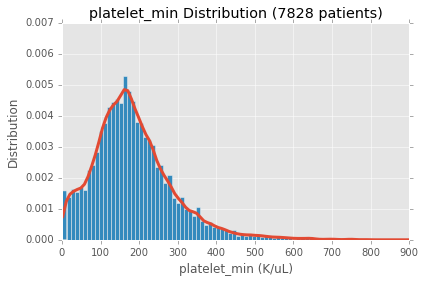

best bandwidth: 0.1


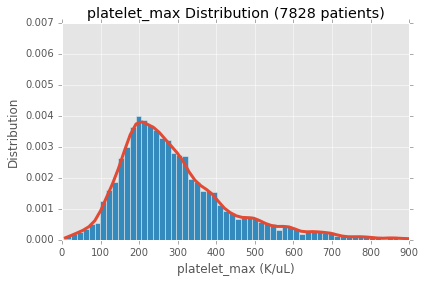

best bandwidth: 0.1


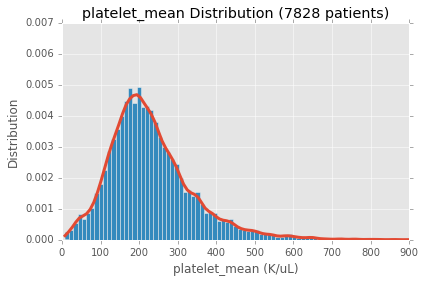

best bandwidth: 0.1


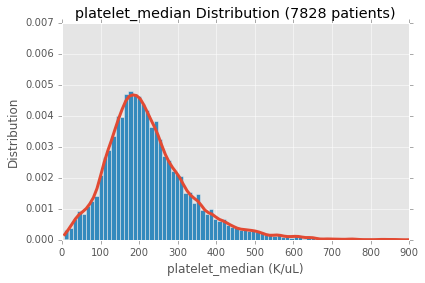

best bandwidth: 0.1


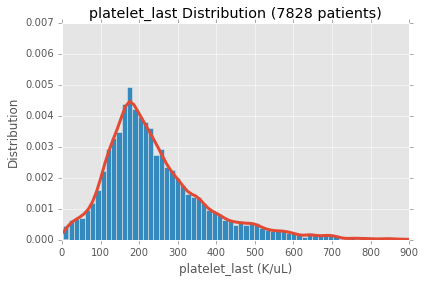

best bandwidth: 0.1


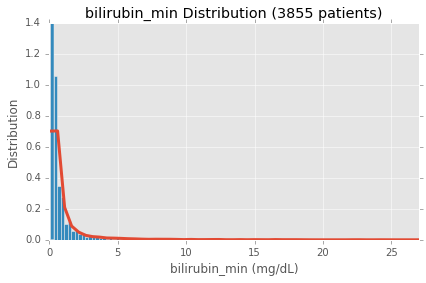

best bandwidth: 0.1


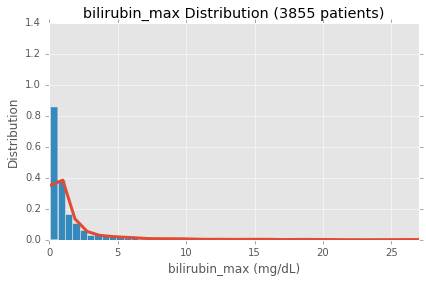

best bandwidth: 0.1


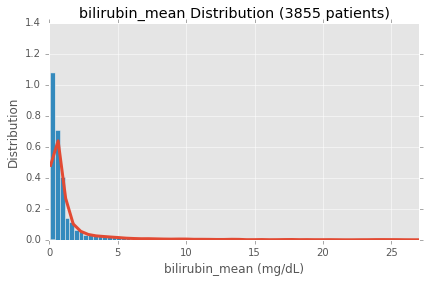

best bandwidth: 0.1


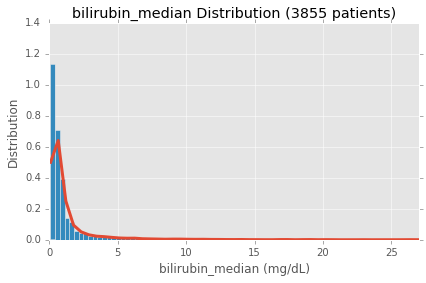

best bandwidth: 0.1


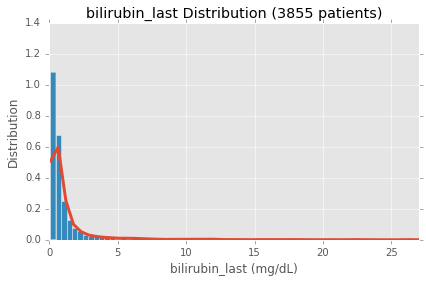

best bandwidth: 0.215443469003


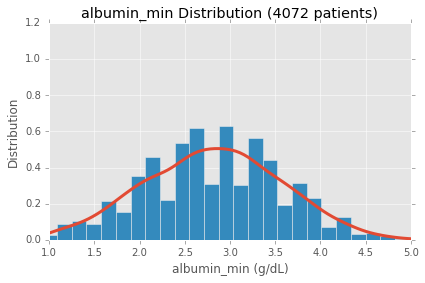

best bandwidth: 0.215443469003


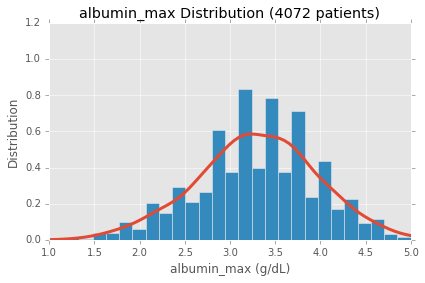

best bandwidth: 0.215443469003


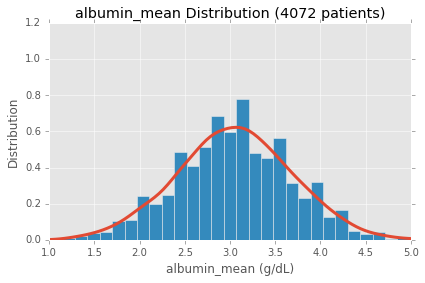

best bandwidth: 0.16681005372


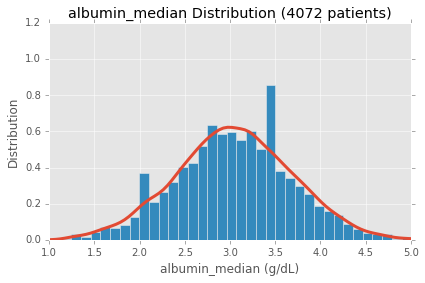

best bandwidth: 0.215443469003


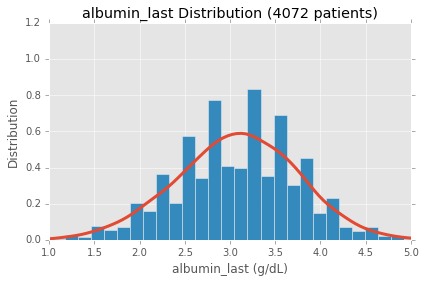

best bandwidth: 0.1


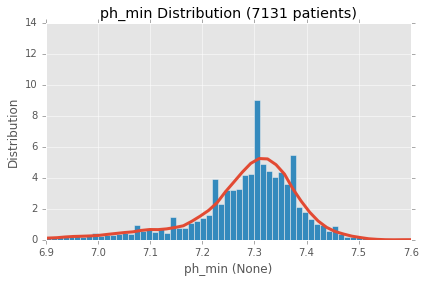

best bandwidth: 0.16681005372


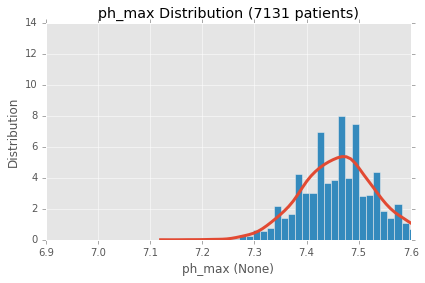

best bandwidth: 0.129154966501


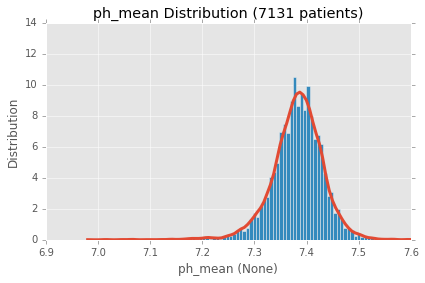

best bandwidth: 0.1


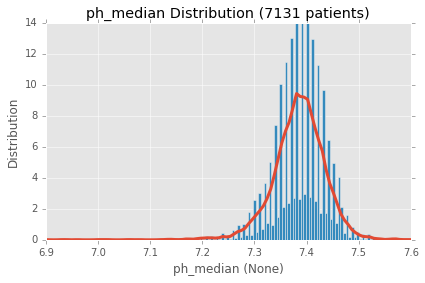

best bandwidth: 0.1


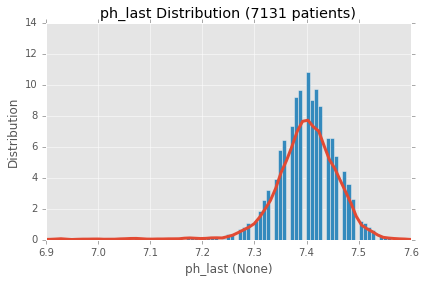

best bandwidth: 0.1


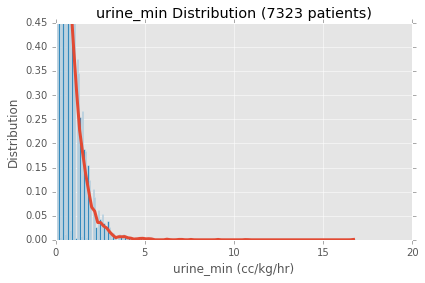

best bandwidth: 0.1


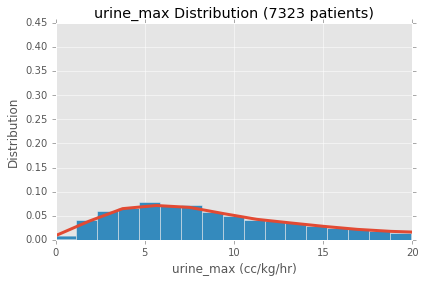

best bandwidth: 0.1


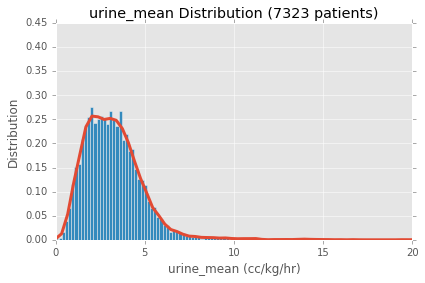

best bandwidth: 0.1


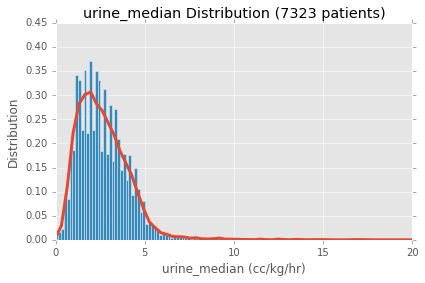

best bandwidth: 0.1


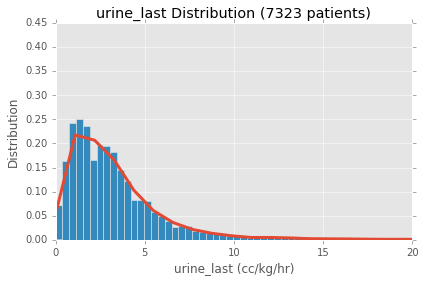

best bandwidth: 0.1


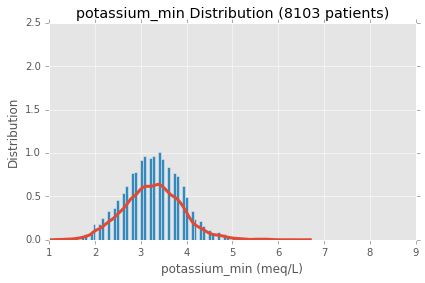

best bandwidth: 0.1


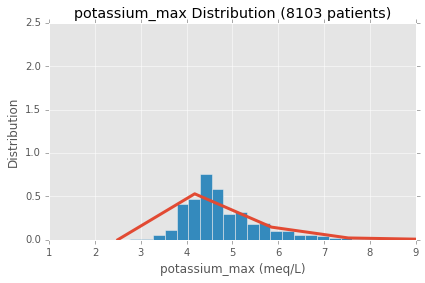

best bandwidth: 0.1


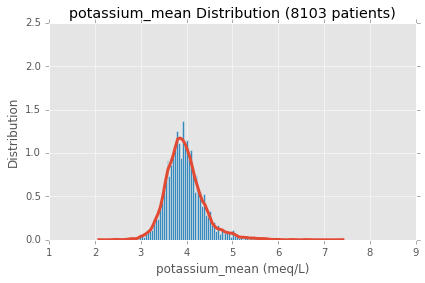

best bandwidth: 0.1


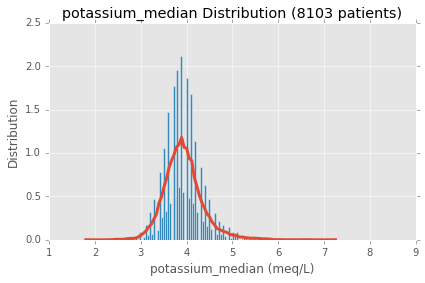

best bandwidth: 0.1


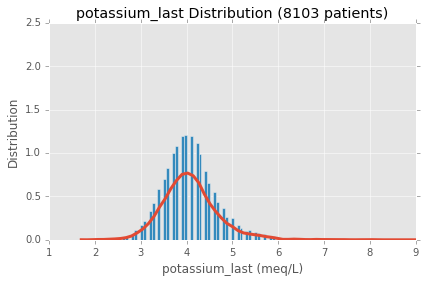

best bandwidth: 0.129154966501


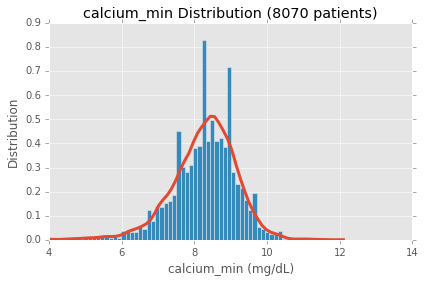

best bandwidth: 0.1


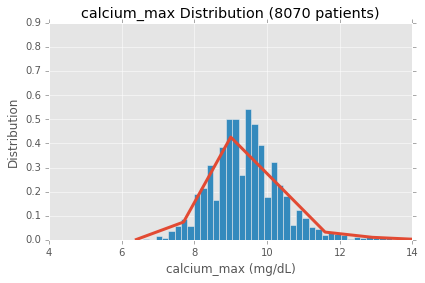

best bandwidth: 0.129154966501


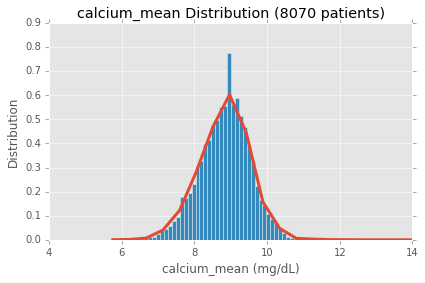

best bandwidth: 0.129154966501


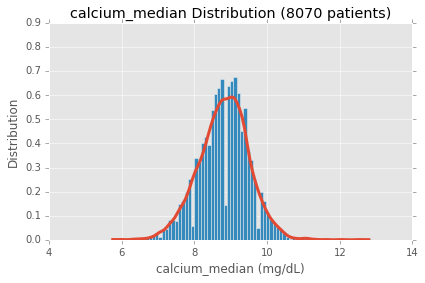

best bandwidth: 0.129154966501


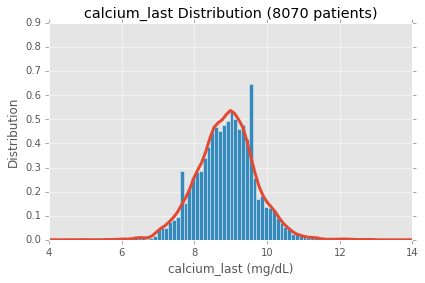

best bandwidth: 0.1


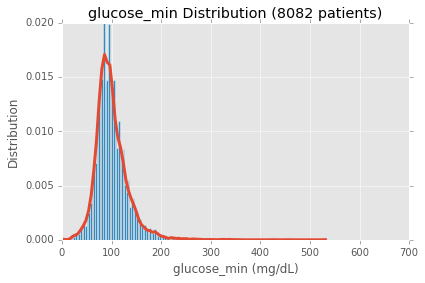

best bandwidth: 0.1


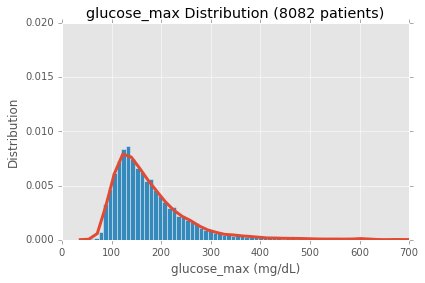

best bandwidth: 0.1


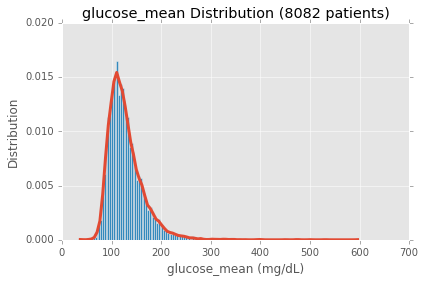

best bandwidth: 0.1


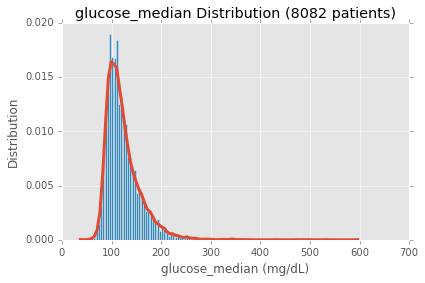

best bandwidth: 0.1


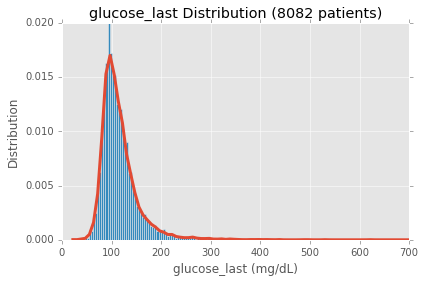

best bandwidth: 0.1


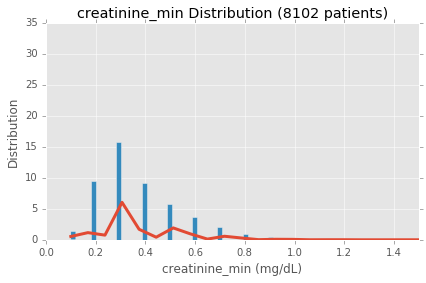

best bandwidth: 0.16681005372


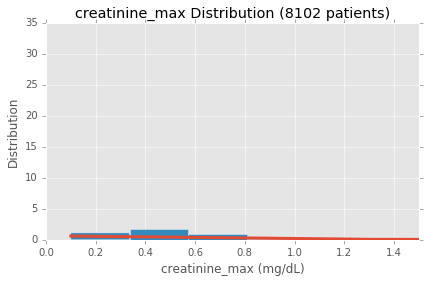

best bandwidth: 0.129154966501


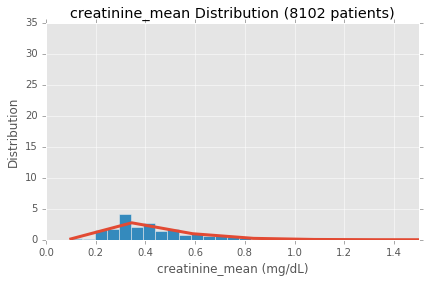

best bandwidth: 0.1


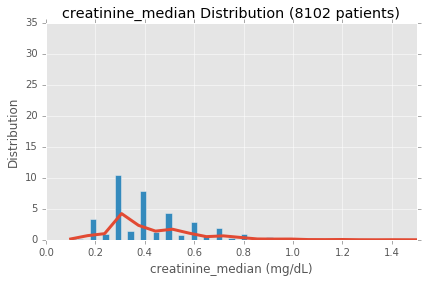

best bandwidth: 0.1


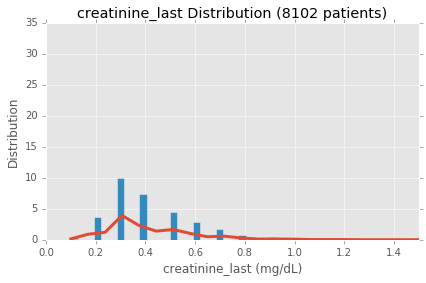

best bandwidth: 0.1


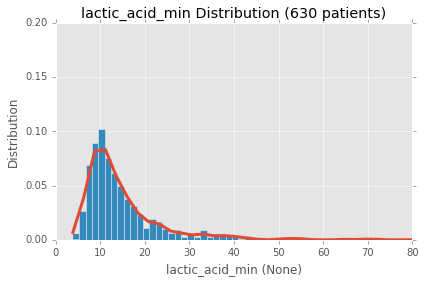

best bandwidth: 0.1


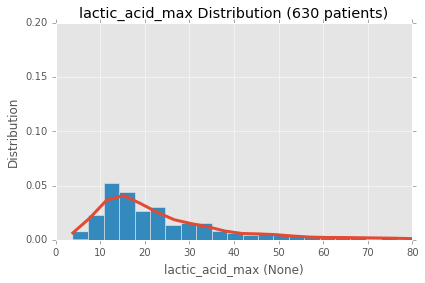

best bandwidth: 0.1


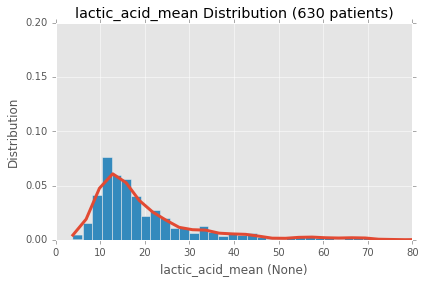

best bandwidth: 0.1


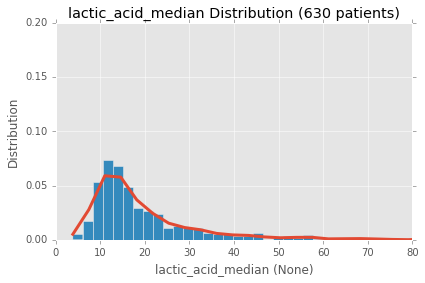

best bandwidth: 0.1


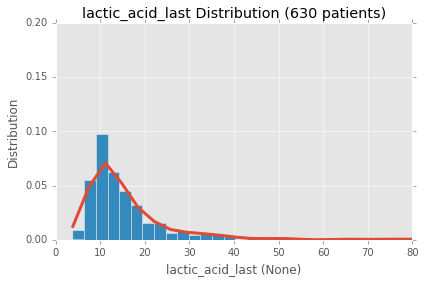

best bandwidth: 0.1


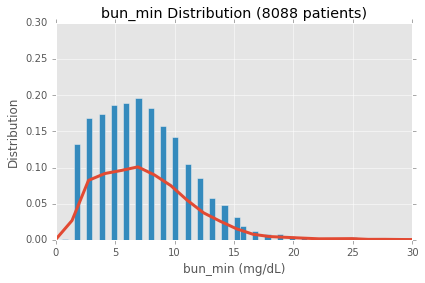

best bandwidth: 0.1


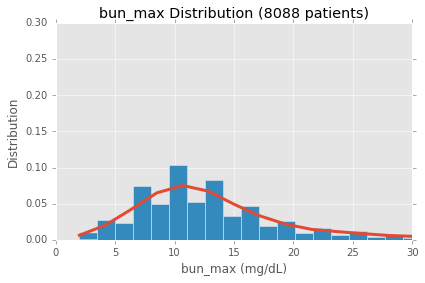

best bandwidth: 0.1


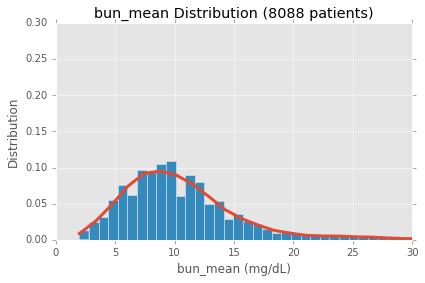

best bandwidth: 0.1


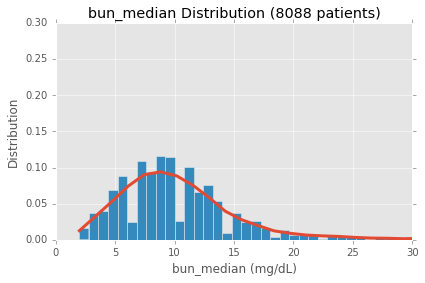

best bandwidth: 0.1


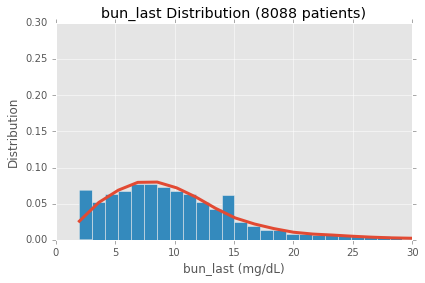

best bandwidth: 0.1


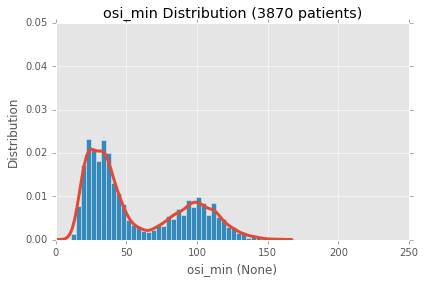

best bandwidth: 0.1


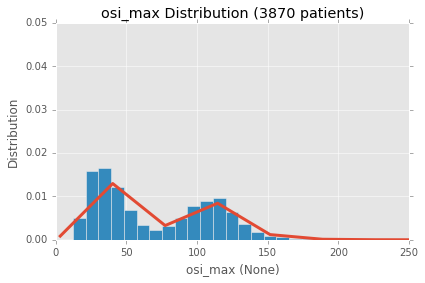

best bandwidth: 0.1


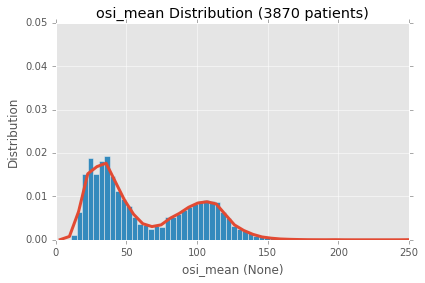

best bandwidth: 0.1


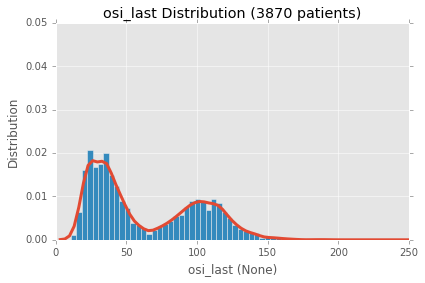

best bandwidth: 0.1


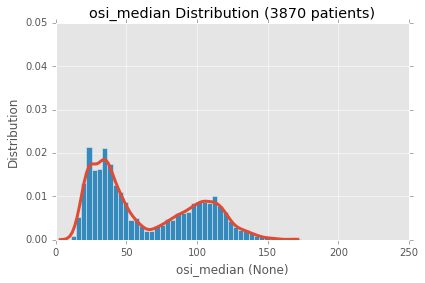

best bandwidth: 0.129154966501


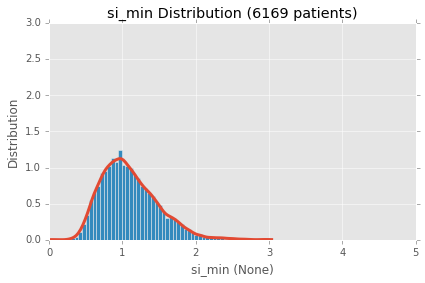

best bandwidth: 0.1


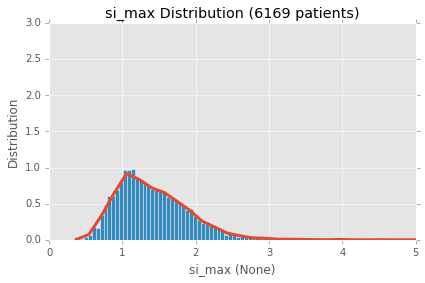

best bandwidth: 0.1


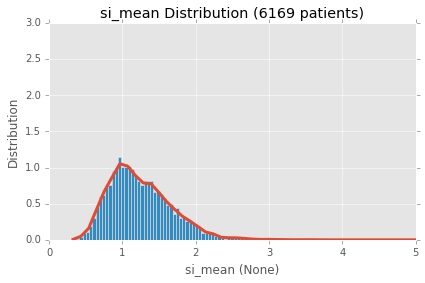

best bandwidth: 0.16681005372


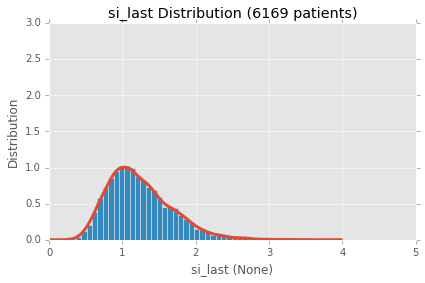

best bandwidth: 0.1


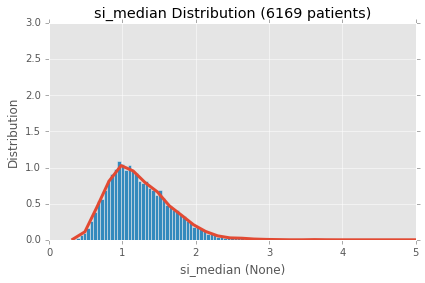

best bandwidth: 0.1


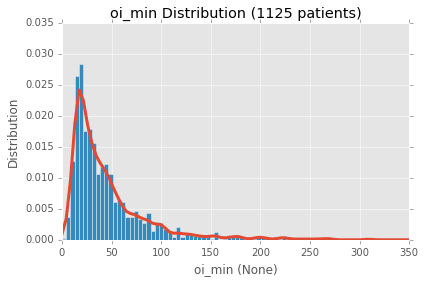

best bandwidth: 0.1


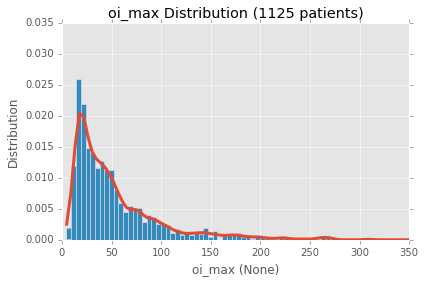

best bandwidth: 0.1


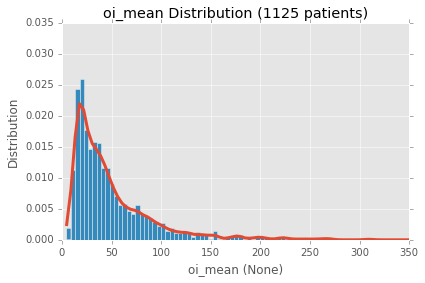

best bandwidth: 0.1


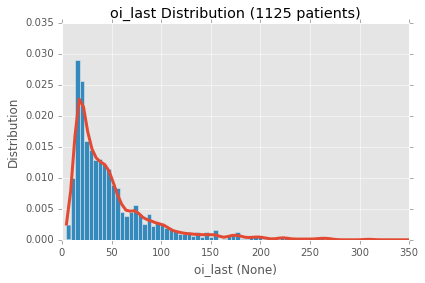

best bandwidth: 0.1


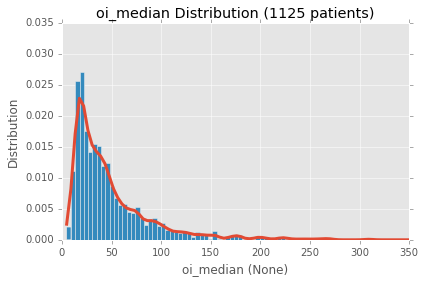

In [2]:
reload(paki)
plt.ion
dbname = 'ism'

# _age_lim = [(1/12.,1/2.), (1/2., 1.), (1., 4.), (4., 7.), (7., 9.), (9., 21.)]
io_onset_aki = pd.read_pickle(os.path.join(os.path.dirname("__file__"), "io_ism4", "ism_onset_io_tlag012_twin006_aki.pkl"))
io_onset_con = pd.read_pickle(os.path.join(os.path.dirname("__file__"), "io_ism4", "ism_onset_io_tlag012_twin006_con.pkl"))
_io_onset = pd.concat([io_onset_aki, io_onset_con])
try:
    _io_onset = _io_onset.drop(['race_unique'], axis=1)
except:
    pass

exclude_flag = False
if exclude_flag:
    stats = ['min', 'max', 'mean', 'median', 'last']
    ex_fts = ['hr', 'nsbp', 'ndbp', 'spo2']
    ex_ft_stats = [ex_ft+"_"+stat for ex_ft in ex_fts for stat in stats]
    in_ft_stats = [ft_stat for ft_stat in _io_onset.columns if ft_stat not in ex_ft_stats]    

    _io_onset = _io_onset.loc[:, in_ft_stats]

include_flag = False
if include_flag:
    in_fts = ['si', 'osi', 'oi']
    stats = ['max', 'min', 'median', 'mean','last']
    in_ft_stats = [ft+"_"+stat for ft in fts for stat in stats]
    ft_default = ['patient_id', 'encounter_id', 'age', 'sex', 'AKI_stage']
    in_ft_stats.extend(ft_default)
    _io_onset = _io_onset.loc[:, in_ft_stats]
    


# for ft in _io_onset.columns:
#     if 'lactic_acid' in ft:
#         _io_onset[ft] = _io_onset[ft]*9.009        
#     elif 'creatinine' in ft:
#         _io_onset[ft] = _io_onset[ft]*0.01131
#     elif 'glucose' in ft:
#         _io_onset[ft] = _io_onset[ft]*18.0182
#     elif 'albumin' in ft:
#         _io_onset[ft] = _io_onset[ft]*0.1  
        
xlim_all = list()
ylim_all = list()
predictors = [ft for ft in _io_onset.columns if ft not in ['age', 'sex', 'encounter_id', 'AKI_stage', 'patient_id']]
for item in predictors:
    label = item[:item.rfind("_")]
#     print(label)
    xlim = chartitem.val_lim[chartitem.label==label].unique()
    ylim = chartitem.pdf_lim[chartitem.label==label].unique()
    if ~pd.isnull(xlim):
        eval("xlim_all.append({})".format(xlim[0]))
    else:
        xlim_all.append((None, None))
    if ~pd.isnull(ylim):
        eval("ylim_all.append({})".format(ylim[0]))
    else:
        ylim_all.append((None, None))

paki.getDistIOmat(_io_onset, 'onset', age_lim=None, sex=None, xlim=xlim_all, ylim=ylim_all, 
                  dump_fig=True, dbstring=dbname)
# paki.getDistIOmat(_io_onset, 'onset', age_lim=_age_lim, sex=None, xlim=xlim_all, ylim=ylim_all, 
#                   dump_fig=True, dbstring=dbname)

### Check for unreasonable values (possibility filter)
> TODO: Embed the below block into the getIOmatrix function

In [31]:
io_df = pd.read_pickle(os.path.join(os.path.dirname("__file__"), "io_ism4", "ism_onset_io_tlag012_twin006_con.pkl"))
features = ['nsbp', 'ndbp', 'hr', 'spo2', 'ratio_pao2_flo2', 'hemoglobin', 'temperature', 
            'wbc', 'platelet', 'bilirubin', 'albumin', 'ph', 'urine', 'potassium', 'calcium', 
            'glucose', 'creatinine', 'lactic_acid', 'osi', 'si', 'oi']
stats = ['last', 'max', 'median', 'mean', 'min']
pb_filter = {'nsbp': [0, 1000], 
             'ndbp': [0, 1000], 
             'hr': [0, 1000],
             'spo2': [0, 100],
             'ratio_pao2_flo2': [0, 3000],
             'hemoglobin': [0, 100], 
             'temperature': [20, 50],
             'wbc': [0, 1000],
             'platelet': [0, 2000],
             'bilirubin': [0, 100],
             'albumin': [0, 10],
             'ph': [0, 14],
             'urine': [0, 300],
             'potassium': [0, 300],
             'calcium': [0, 200],
             'glucose': [0, 3000],
             'creatinine': [0, 200],
             'lactic_acid': [0, 500],
             'bun': [0, 300],
             'osi': [0, 5000],
             'si': [0, 50],
             'oi': [0, 1000]
            }
io_df.count()

patient_id                6963
encounter_id              6963
age                       6963
sex                       6963
AKI_stage                 6963
nsbp_min                  5302
nsbp_max                  5302
nsbp_mean                 5302
nsbp_median               5302
nsbp_last                 5302
ndbp_min                  5293
ndbp_max                  5293
ndbp_mean                 5293
ndbp_median               5293
ndbp_last                 5293
hr_min                    6331
hr_max                    6331
hr_mean                   6331
hr_median                 6331
hr_last                   6331
spo2_min                  6330
spo2_max                  6330
spo2_mean                 6330
spo2_median               6330
spo2_last                 6330
ratio_pao2_flo2_min       2228
ratio_pao2_flo2_max       2228
ratio_pao2_flo2_mean      2228
ratio_pao2_flo2_median    2228
ratio_pao2_flo2_last      2228
hemoglobin_min            2095
hemoglobin_max            2095
hemoglob

## Distribution of lactic acid (onset)

In [ ]:
xlim_all = [(0,80)]*3
ylim_all = [(0,0.2)]*3
_io_onset_lac = _io_onset.loc[:, ['patient_id', 'encounter_id', 'age', 'sex', 'AKI_stage',
                                  'lactic_acid_min', 'lactic_acid_max', 'lactic_acid_mean']]
paki.getDistIOmat(_io_onset_lac, 'onset', age_lim=_age_lim, sex=None, xlim=xlim_all, ylim=ylim_all, dump_fig=True)

## Distribution of blood urea nitrogen (Onset)

In [ ]:
xlim_all = [(0,30)]*3
ylim_all = [(0,0.3)]*3
_io_onset_bun = _io_onset.loc[:, ['patient_id', 'encounter_id', 'age', 'sex', 'AKI_stage',
                                  'bun_min', 'bun_max', 'bun_mean']]
paki.getDistIOmat(_io_onset_bun, 'onset', age_lim=_age_lim, sex=None, xlim=xlim_all, ylim=ylim_all, dump_fig=True)

In [ ]:
def delgroup(_group):
    if _group.patient_id==33:
        _group.

In [ ]:
_io_onset_bun.patient_id.unique()

In [ ]:
aa = _io_onset_bun.loc[_io_onset_bun.patient_id==33, :]


In [4]:
ft_to_corr = ['lactic_acid', 'creatinine', 'glucose', 'albumin']
suffix = ['max', 'min', 'median', 'mean','last']
ft_full = [ft+"_"+suff for ft in ft_to_corr for suff in suffix]
ft_default = ['patient_id', 'encounter_id', 'age', 'sex', 'AKI_stage']
ft_full.extend(ft_default)

In [9]:
'lactic_acid' in ft_full[0]

False

In [8]:
ft_full

['lactic_acid_max',
 'lactic_acid_min',
 'lactic_acid_median',
 'lactic_acid_mean',
 'lactic_acid_last',
 'creatinine_max',
 'creatinine_min',
 'creatinine_median',
 'creatinine_mean',
 'creatinine_last',
 'glucose_max',
 'glucose_min',
 'glucose_median',
 'glucose_mean',
 'glucose_last',
 'albumin_max',
 'albumin_min',
 'albumin_median',
 'albumin_mean',
 'albumin_last',
 'patient_id',
 'encounter_id',
 'age',
 'sex',
 'AKI_stage']